# Анализ поведения пользователей в мобильном приложении

## Структура исследования

* [Описание проекта](#Описание-проекта)

 * Сформулировать цель
 * Сформулировать задачи
 * Описать предоставленные данных
 
* [Материалы](#Материалы)

* [Предобработка данных](#Предобработка-данных)

 * Выгрузить и составить первичное знакомство с данными
 * Проверить корректность наименования и переименовать колонки
 * Исследовать и заменить пропущенные значения
 * Исследовать и привести типы данных в соответствие
 * Исследовать и обработать дубликаты

* [Общий исследовательский анализ](#Общий-исследовательский-анализ)

 * Составить портрет пользователя на основании поведения:
   * Отсортировать события по популярности
   * Оценить рапределение событий по времени и показать на графике
   * Рассчитать общие показатели по конверсии
   * Сформировать предположения по связям между событиями
   
 * Подготовка сессий
   * Рассчитать длительность одной сессии и разделить события на сессии
   * Рассчитать lifetime и retention rate

* [Анализ поведения пользователей](#Анализ-поведения-пользователей)

 * Выделить события, которые совершают пользователи вместе с целевым событием
   * Выделить сессии с целевым событием и определить другие события в них
   * Показать распределение вспомогательных событий на графике

 * Проанализировать, часто ли эти события бывают самостоятельными или составляют какую-то воронку
   * Выделить сессии без целевого действия и определить события в них
   * Определить порядок событий для составления воронки (воронок)

 * Проанализировать, за какое время до целевого события совершаются вспомогательные события
   * Рассчитать разницу между целевым и вспомогательным событием в рамках 1 сессии и для разных сессий 1 пользователя

* [Проверка гипотез](#Проверка-гипотез)

 * Первая: конверсия в просмотры контактов различается у двух групп (первая совершает действия `tips_show` и `tips_click`, вторая - только `tips_show`)
 * Вторая: конверсия в просмотры контактов различается у двух групп (первая совершает действие `favorites_add`, вторая - нет)

* [Выводы и рекомендации](#Выводы-и-рекомендации)

## Описание проекта

В мобильном приложении "Ненужные вещи" пользователи продают свои ненужные вещи, размещая их на доске объявлений. По запросу менеджера продукта необходимо проанализировать действия пользователей за отчетный период. В качестве данных используются логи активности пользователей `'mobile_dataset'` и дополнительный датасет `'mobile_sources'` с информацией об источниках, откуда пришли пользователи. Анализ нужен для выделения основных сценариев использования приложения и оценки, какие "фичи" работают. 

### Цель

Оценить степень влияния действий пользователя на целевое событие — просмотр контактов, включая 
1. Анализ связи целевого события и других действий пользователей
2. Оценку действий, которые чаще совершают те пользователи, которые просматривают контакты.

### Задачи

1. Выделить такие события, которые часто совершают пользователи вместе с целевым событием (`contacts_show` и `show_contacts`)
2. Проанализировать, часто ли эти события бывают самостоятельными событиями пользователя или они составляют какую-то воронку
3. Проанализировать, за какое время до целевого события совершаются вспомогательные события.

### Описание данных

Датасет `mobile_dataset.csv` содержит данные о событиях, совершенных в мобильном приложении "Ненужные вещи". В нем пользователи продают свои ненужные вещи, размещая их на доске объявлений. В датасете содержатся данные пользователей, впервые совершивших действия в приложении после 7 октября 2019 года.

Датасет `mobile_sources.csv` содержит данные о источниках, откуда пользователи установили приложение.

Колонки в `mobile_sources.csv`:

- `'userId'` — идентификатор пользователя,
- `'source'` — источник, с которого пользователь установил приложение.

Колонки в `mobile_dataset.csv`:

- `'event.time'` — время совершения,
- `'user.id'` — идентификатор пользователя,
- `'event.name'` — действие пользователя.

Виды действий:

- `advert_open` — открыл карточки объявления,
- `photos_show` — просмотрел фотографий в объявлении,
- `tips_show` — увидел рекомендованные объявления,
- `tips_click` — кликнул по рекомендованному объявлению,
- `contacts_show` и `show_contacts` — посмотрел номер телефона,
- `contacts_call` — позвонил по номеру из объявления,
- `map` — открыл карту объявлений,
- `search_1` — `search_7` — разные действия, связанные с поиском по сайту,
- `favorites_add` — добавил объявление в избранное.

&uarr; [Структура исследования](#Структура-исследования)

## Материалы

* [Презентация](https://disk.yandex.ru/i/9ennV_vuJPEIWg)
* [Дашборд](https://public.tableau.com/views/DA35_Kotov_final_dashboard/Dashboard1?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)
* [Датасет для дашборда](https://disk.yandex.ru/d/RzhPARbCs4LB8A)

<div class="alert alert-note" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " >
Для дашборда взят не исходный, а обработанный датасет, где события очищены от лишних видов и добавлены источники к пользователям. В код ниже добавлен код для выгрузки датасета локально для использования в Tableau.
Оба набора из ТЗ размещены на одном дашборде с фильтром по дате, при этом фильтр по видам событий работает только с распределением событий по дням. Количество событий добавлено в подсказки, а пропорции (доли) визуализированы диаграммой. 
</div>

&uarr; [Структура исследования](#Структура-исследования)

## Предобработка данных

Задачи этапа:

 * Выгрузить и составить первичное знакомство с данными
 * Проверить корректность наименования и переименовать колонки
 * Исследовать и заменить пропущенные значения
 * Исследовать и привести типы данных в соответствие
 * Исследовать и обработать дубликаты

In [1]:
# импортируем библиотеки и модули
import pandas as pd

# установим ограничение для того, чтобы в типе данных float отобрадалось не больше 2-х знаков после запятой
pd.set_option('display.float_format', '{:,.2f}'.format) 

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta

from scipy import stats as st
import numpy as np
import math as mth

# отключим предупреждения при выводе данных и графиков
import warnings
warnings.filterwarnings('ignore')

In [2]:
# выгрузим первый датасет и посмотрим на первые 10 строк
dataset = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_dataset.csv')
print('В датасете строк и столбцов:', dataset.shape)
dataset.head(10)

В датасете строк и столбцов: (74197, 3)


event.time   event.name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   
5  2019-10-07 00:01:19.993624    tips_show   
6  2019-10-07 00:01:27.770232  advert_open   
7  2019-10-07 00:01:34.804591    tips_show   
8  2019-10-07 00:01:49.732803  advert_open   
9  2019-10-07 00:01:54.958298  advert_open   

                                user.id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
5  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
6  020292ab-89bc-4156-9acf-68bc2783f894  
7  020292ab-89bc-4156-9acf-68bc2783f894  
8  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
9  020292ab-89bc-4156-9acf-68bc2783f894

Итак, в датасете больше 74 тысяч записей о различных событий без учета пропусков и дубликатов. На первый взгляд, данные соответствуют описанию выше и аномалий нет. Время событий дано с точностью до милисекунды, которой скорей всего можно пренебречь, но степень округления лучше установить после оценки общего периода, за который собраны данные о событиях.

Посмотрим на второй датасет.

In [3]:
# выгрузим второй датасета и посмотрим на первые 10 строк
sourсes_df = pd.read_csv('https://code.s3.yandex.net/datasets/mobile_soures.csv')
print('В датасете строк и столбцов:', sourсes_df.shape)
sourсes_df.head(10)

В датасете строк и столбцов: (4293, 2)


userId  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google
5  17f6b2db-2964-4d11-89d8-7e38d2cb4750  yandex
6  62aa104f-592d-4ccb-8226-2ba0e719ded5  yandex
7  57321726-5d66-4d51-84f4-c797c35dcf2b  google
8  c2cf55c0-95f7-4269-896c-931d14deaab5  google
9  48e614d6-fe03-40f7-bf9e-4c4f61c19f64  yandex

Второй датасет содержит ID более 4200 уникальных пользователей с указанием источника, откуда они перешли к установке приложения. Это большой объем при том, что сумма строк в первом датасете кратно больше - всё вместе это дает основания полагать, что данных для анализа будет достаточно.

Судя по первым 10 строкам из таблицы `sources`, формат ID соответствует первом датасету для объединения данных, если потребуется, а источники укрупнены до 3-х наименований без детализации, которая дала бы больше пищи для поиска связей и инсайтов. Например, нельзя точно сказать, что `'yandex'` отсылает к Поиску, а не контентным проектам, а под `'google'` понимается Поиск или Play Market. Стоит зафиксировать в рекомендациях для сбора данных - расшифровать источники и/или разбить на более мелкие категории, что главным образом касается `'other'`.

Обращает внимание, что названия столбцов в первом датасете даны с точкой между словами, а во втором - меняется регистр. Это создает трудности для объединения и обработке 2-х столбцов (например, названия с точкой могут быть восприняты как ссылка на сайт). Поэтому стоит привести все названия столбцов к "змеиному" регистру.

Зададим функцию для вывода ключевой информации и предобработки данных с целью проверки типов данных, поиска дубликатов и пропусков, а также приведения названия столбцов к "змеиному" регистру.

In [4]:
def inspect(df):
    df.info()
    print()
    print ('Количество дубликатов -', df.duplicated().sum())
    print()
    print ('Количество пропусков:')
    print (df.isna().sum())
    print()
    df.columns = [x.lower().replace('.', '_') for x in df.columns.values]
    display(df.describe())
    return df

dataset = inspect(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB

Количество дубликатов - 0

Количество пропусков:
event.time    0
event.name    0
user.id       0
dtype: int64



event_time event_name  \
count                        74197      74197   
unique                       74197         16   
top     2019-10-07 00:00:00.431357  tips_show   
freq                             1      40055   

                                     user_id  
count                                  74197  
unique                                  4293  
top     cb36854f-570a-41f4-baa8-36680b396370  
freq                                     478

После обработки названия столбцов приведены к требуемому виду.

В датасете нет полных дубликатов и пропусков, но могут быть нули - проверим, есть ли они.

In [5]:
for col in dataset.columns:
    print('Количество нулей в столбце', col, ':', dataset[col].loc[dataset[col] == 0].count())

Количество нулей в столбце event_time : 0
Количество нулей в столбце event_name : 0
Количество нулей в столбце user_id : 0


Стоит изменить тип данных в столбце `'event_time'` и отметить, что благодаря детализации до милисекунд не зафиксировано ни одного события, которое происходило бы одновременно с другим (количество записей в таблице равно количество уникальных временных отметок) - это дополнительное подтверждение того, что среди данных нет дубликатов.

In [6]:
dataset['event_time'] = pd.to_datetime(dataset['event_time'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   event_time  74197 non-null  datetime64[ns]
 1   event_name  74197 non-null  object        
 2   user_id     74197 non-null  object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.7+ MB


Первый датасет готов для анализа.

Проведем ту же предобработку со вторым, используя ранее созданную функцию.

In [7]:
sourсes_df = inspect(sourсes_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB

Количество дубликатов - 0

Количество пропусков:
userId    0
source    0
dtype: int64



userid  source
count                                   4293    4293
unique                                  4293       3
top     020292ab-89bc-4156-9acf-68bc2783f894  yandex
freq                                       1    1934

In [8]:
for col in sourсes_df.columns:
    print('Количество нулей в столбце', col, ':', sourсes_df[col].loc[sourсes_df[col] == 0].count())

Количество нулей в столбце userid : 0
Количество нулей в столбце source : 0


Пропусков, дубликатов и нулей нет - более того, все ID пользователей уникальны и равны количеству таковых из первого датасета. Переименуем столбец `'userid'` и проверим, полностью ли совпадают списки ID из двух датасетов.

In [9]:
sourсes_df = sourсes_df.rename(columns={'userid':'user_id', 'source':'source'})

In [10]:
dataset = dataset.merge(sourсes_df, on='user_id', how='left')
print('Количество пропусков при объединении по user_id:', dataset['source'].isna().sum())

Количество пропусков при объединении по user_id: 0


Пропусков нет, а значит при равном количестве уникальных `'user_id'` в обоих датафреймах эти столбцы полностью совпадают.

Предобработка завершена, можно переходить к анализу данных.

&uarr; [Структура исследования](#Структура-исследования)

## Общий исследовательский анализ

### Составить портрет пользователя на основании поведения

Задачи этапа:

   * Составить рейтинг событий по популярности
   * Оценить рапределение событий по времени и показать на графике
   * Рассчитать общие показатели по конверсии
   * Сформировать предположения по связям между событиями

Чтобы получить общее представление о пользователях, сперва посмотрим на события, которые они совершают, и сравним с описанием в данных.

In [11]:
dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
advert_open       6164
contacts_show     4450
map               3881
search_1          3506
favorites_add     1417
search_5          1049
tips_click         814
search_4           701
contacts_call      541
search_3           522
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

Все события из описания представлены в датасете.

Самое популярное событие - это `tips_show` или просмотр рекомендаций. Скорей всего, кратное превосходство над любым другим видом действий связано с тем, что за просмотр засчитывается показ не только в карточке товара, но и на главной странице приложения, в каталоге под основными товарами и в избранном. То есть рекомендации не нужно открывать или как-то с ними взаимодействовать, чтобы событие было зафиксировано. Тем более, что `tips_click` или клик по ним выделен в отдельное действие.

Второе по популярности событие - это `photos_show` или просмотр фотографий. Так как их количество выше, чем сумма действий вида `advert_open`, значит фотографии просматриваются не только при открытии карточки. Дополнительно их либо можно просматривать из каталога (например, скроллом или долгим тапом для увеличения), либо засчитываются дополнительные просмотры за каждую новую фотографию из галереи в карточке объявления.

Чтобы лучше оценить популярность остальных событий, стоит привести `contacts_show` и `show_contacts` к общему наименованию, а также все действия типа `search` - разница между ними никак не описана, и значит несущественна.

In [12]:
dataset['event_name'].loc[dataset['event_name'] == 'show_contacts'] = 'contacts_show'
dataset['event_name'] = dataset['event_name'].replace(
    ['search_1', 'search_2', 'search_3', 'search_4', 'search_5', 'search_6', 'search_7'], 'search'
)

In [13]:
dataset['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

После изменений поисковые действия суммарно заняли 3 место, а просмотры контактов спустились на 5-е. Неизвестно, можно ли вызывать обе эти функции только с конкретных страниц (например, из карточки или каталога) или они доступны практически из любого раздела приложения. Так или иначе, поиск - это, скорей всего, основной инструмент для выбора объявлений и начало воронки, особенно при первом запуске приложения, когда рекомендации еще не сформированы, а в избранном пусто.

Низкую популярность звонков напрямую из приложения можно объяснить тем, что пользователь чаще копирует номер телефона для вызова через так называемую "звонилку" или мессенджер. К остальным функциям вернемся, когда будут построены воронки по сессиям от пользователей.

Пока рейтинг популярности событий скорее описывает механику работы приложения, чем поведение пользователя, который по задумке разработчиков действует по определенному пути. Понять лучше механику и последовательность активации событий поможет разделение на сессии, цепочки или воронки на следующем этапе анализа.

А пока посмотрим, как популярность событий распределяется по времени и есть ли заметные паттерны. Для этого добавим 2 дополнительных столбца с датой и днем недели.

In [14]:
dataset['date'] = dataset['event_time'].dt.date
dataset['weekday'] = dataset['event_time'].dt.weekday

In [15]:
# сохраним датасет для работы в дашборде
dataset.to_csv('\datasets\dataset.csv', index=False) 

In [16]:
date_pivot = dataset.pivot_table(index=['event_name'], columns='date', values='event_time', aggfunc='count')

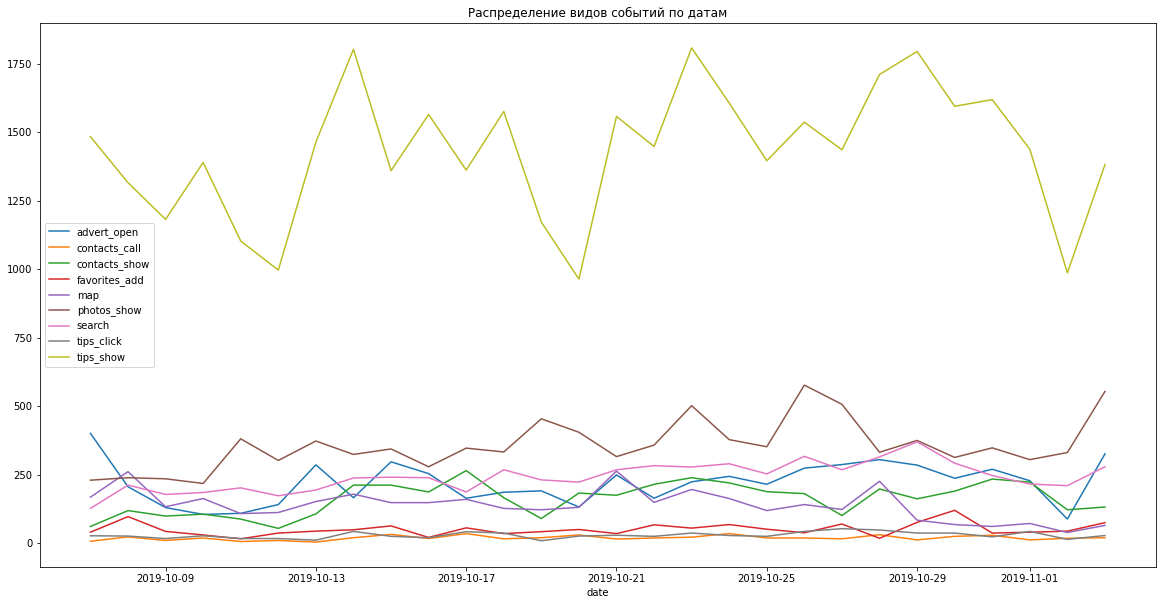

In [17]:
date_pivot.T.plot(figsize=(20, 10))
plt.title('Распределение видов событий по датам')
plt.legend()
plt.show();

Самый информативный график - это количество просмотренных рекомендаций. Он показывает волнобразное движение с особенно глубокими проседаниями раз в несколько дней - возможно, это определенные дни недели или даты, связанные с маркетинговыми активностями или внешними событиями. Стоит проверить это позже.

Просмотры фотографий рисуют похожую кривую с сопоставимыми пиками активности, но в существенно меньшем объеме. Другие события мало похожи на эти 2 графика и не показывают явных трендов, кроме общего роста в последний день наблюдений.

Посмотрим на распределение событий по дням недели.

In [18]:
weekday_pivot = dataset.pivot_table(index=['event_name'], columns='weekday', values='event_time', aggfunc='count')

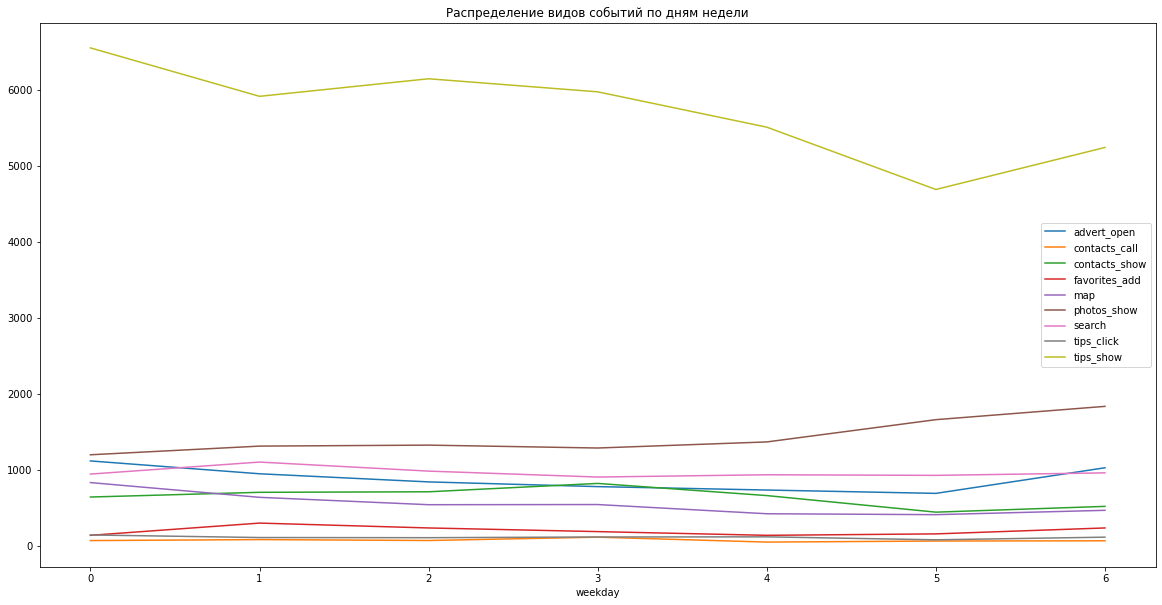

In [19]:
weekday_pivot.T.plot(figsize=(20, 10))
plt.title('Распределение видов событий по дням недели')
plt.legend()
plt.show();

Если считать показ рекомендаций в разных разделах приложения как показатель общей активности, то становится очевидным, что:
* пиковую активность пользователи демонстрируют в понедельник и в выходные меньше всего пользуются приложением
* при этом большую часть фотографий пользователи просматривают, наоборот, в субботу и воскресенье
* а максимальные просмотры контактов приходятся на четверг, когда остальные графики находятся в средних значениях

Рассчитаем DAU как границу между ростом и снижением пользовательской активности и добавим на аналогичные графики.

In [20]:
dau = (
    dataset.groupby('date').agg({'user_id': 'nunique'}).mean()
)

In [21]:
#dau = dataset['user_id'].nunique() / dataset['date'].nunique()
print('DAU:', '{:.2f}'.format(dau['user_id']))

DAU: 279.18


Выше на графике рапределения событий было видно снижение активности по субботам, добавим вертикальные линии на график распределения пользователей, чтобы проверить этот тренд.

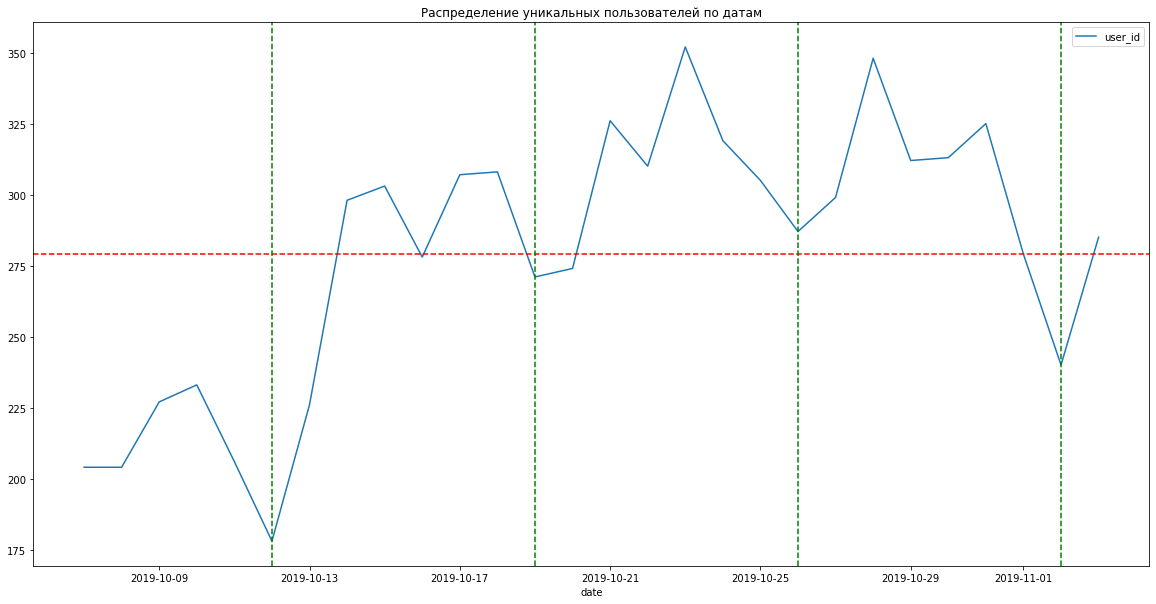

In [22]:
dataset[['date', 'user_id']].groupby('date').agg('nunique').plot(figsize=(20, 10))
plt.title('Распределение уникальных пользователей по датам')
plt.legend()
plt.axhline(y=dau['user_id'], color='red', linestyle='--')
plt.axvline(x='2019-10-12', color='green', linestyle='--')
plt.axvline(x='2019-10-19', color='green', linestyle='--')
plt.axvline(x='2019-10-26', color='green', linestyle='--')
plt.axvline(x='2019-11-02', color='green', linestyle='--')
plt.show();

График показывает, что рост активности в приложении был поэтапным: минимальные значения в начале периода с резким падением и еще более резким ростом, что может говорить о техническом сбое в работе либо о паузе в маркетинговых активностях. Если, например, в начале месяца была запущена рекламная кампания с небольшим бюджетом для тестирования разных форматов. Затем маркетологи взяли паузу, чтобы подвести промежуточные итоги и согласовать увеличение расходов на инструменты с лучшими показателями. Масштабирование дало результат, и в 10-х числах количество пользователей держалось выше среднего практически без сбоев. Предположение о влиянии продвижения поддерживает спад активности в начале следующего месяца, когда маркетологи обычно берут паузу, чтобы подвести итоги и согласовать бюджет на следующий период. В то время, как гипотезу о сбое не поддерживают сопоставимые провалы на графике с событиями выше.

Наиболее заметные провалы на графике 12 октября и 2 ноября - это субботы. Между ними - в остальные субботы - также наблюдались снижения пользовательской активности каждую неделю. Отсюда можно сделать вывод, что на активность маркетологов и пользователей влияет обычный рабочий график: 5 через 2 - а воскресенье показатели поднимаются на уровень пятницы.

Посмотрим на распределение уникальных пользователей по дням недели, чтобы убедиться.

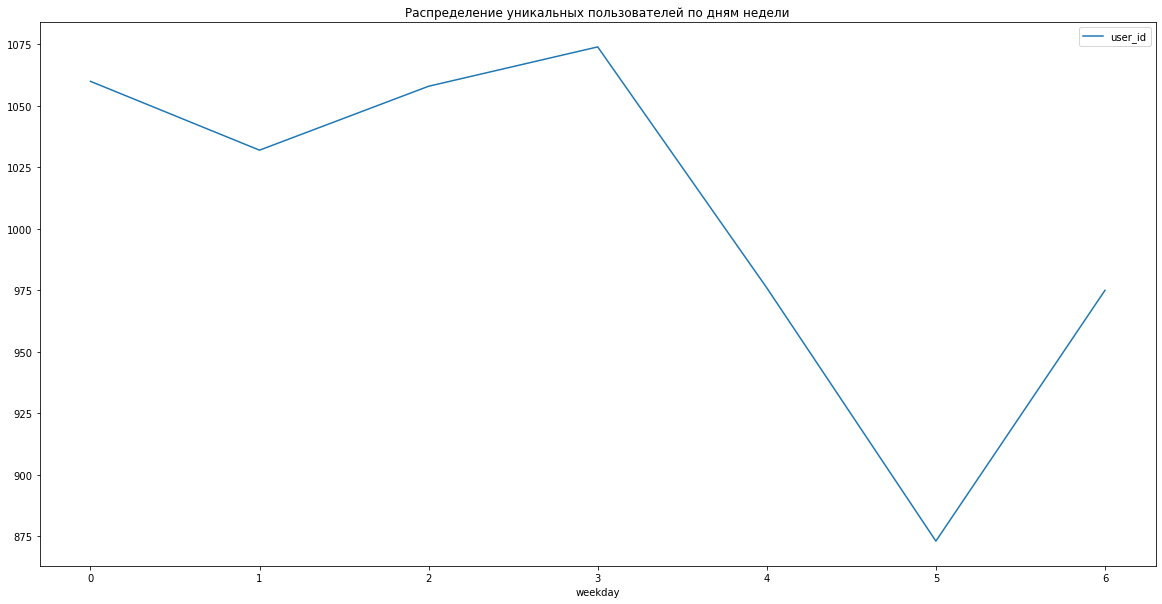

In [23]:
dataset[['weekday', 'user_id']].groupby('weekday').agg('nunique').plot(figsize=(20, 10))
plt.title('Распределение уникальных пользователей по дням недели')
plt.legend()
plt.show();

График подтверждает ту цикличность, которую мы наблюдали выше: активность снижается с пятницы по воскресенье, а пользователи чаще пользуются приложением в понедельник, среду и четверг с небольшим падением во вторник.

Эти были срезы по активности всех пользователей, посмотрим на каждого внутри его lifetime за известный период.

### Lifetime

Начнем с того, что определим крайние точки в предоставленных данных по дате.

In [24]:
print('Первое событие произошло:', dataset['event_time'].min())

Первое событие произошло: 2019-10-07 00:00:00.431357


In [25]:
print('Последнее событие произошло:', dataset['event_time'].max())

Последнее событие произошло: 2019-11-03 23:58:12.532487


In [26]:
print('В датасете собраны данные о событиях за период:', dataset['event_time'].max() - dataset['event_time'].min())

В датасете собраны данные о событиях за период: 27 days 23:58:12.101130


Итак, у нас данные за неполный месяц без явного влияния сезонности (объявления не ограничены по типу товара или услуги) и общеизвестных праздников. За это время через приложение могли пройти 2-3 когорты с lifetime от 7 до 14 дней. 

Чтобы точнее рассчитать lifetime пользователей, определим общее количество событий у каждого пользователя, время первого и последнего зарегистрированных событий, а затем разницу между ними.

In [27]:
event_time = dataset.groupby('user_id').agg({'event_time':['count', 'min', 'max']}).reset_index()
event_time.columns = ['user_id', 'event_total', 'min', 'max']
event_time['lifetime'] = event_time['max'] - event_time['min']
event_time.head()

user_id  event_total  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           35   
1  00157779-810c-4498-9e05-a1e9e3cedf93           71   
2  00463033-5717-4bf1-91b4-09183923b9df           10   
3  004690c3-5a84-4bb7-a8af-e0c8f8fca64e           32   
4  00551e79-152e-4441-9cf7-565d7eb04090            8   

                         min                        max  \
0 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
1 2019-10-19 21:34:33.849769 2019-11-03 17:12:09.708771   
2 2019-11-01 13:54:35.385028 2019-11-01 14:19:17.860053   
3 2019-10-18 22:14:05.555052 2019-10-31 21:42:15.606558   
4 2019-10-25 16:44:41.263364 2019-10-29 02:17:12.342406   

                 lifetime  
0 14 days 21:51:06.817844  
1 14 days 19:37:35.859002  
2  0 days 00:24:42.475025  
3 12 days 23:28:10.051506  
4  3 days 09:32:31.079042

В столбце `'event_total'` даже в первых 5 строках большой разброс по количеству событий. Посмотрим на их распределение по пользователям.

In [28]:
import plotly.express as px
df = event_time.groupby('event_total').count().reset_index()
fig = px.scatter(df, x='event_total', y='user_id', title='Распределение событий по пользователям')
fig.show()

В данных есть небольшая группа пользователей, которые совершили 1 событие - посмотрим, что они делают.

In [29]:
event_one = dataset.groupby('user_id').agg({'event_name':'count'}).query('event_name == 1').reset_index()
print('Доля тех, кто совершил 1 событие:', '{:.2%}'.format(event_one['user_id'].nunique() / dataset['user_id'].nunique()))
print()

event_one_users = event_one['user_id'].unique()
dataset.query('user_id in @event_one_users')['event_name'].value_counts()

Доля тех, кто совершил 1 событие: 1.51%



tips_show        30
map              16
search            8
contacts_show     6
photos_show       4
advert_open       1
Name: event_name, dtype: int64

Практически половина из этих пользователей посмотрела рекомендации, то есть открыла и закрыла приложение. Оставшиеся чаще всего смотрели карту - если эта опция доступна только из карточки объявления, значит либо предположение неверно, либо это ошибка, либо хвост от ранее начатой сессии. Другие события напоминают также о последнем варианте. Таким образом, от них лучше избавиться, чтобы не искажалось представление о воронках внутри приложения.

Посмотрим теперь на тех, за кем в данных отмечены несколько сотен событий.

In [30]:
print(np.percentile(dataset.groupby('user_id')['event_name'].count(), [90, 95, 99]))

[ 36.  59. 132.]


5% пользователей совершают 59 и более событий за отчетный период. Посмотрим, что они делают.

In [31]:
event_more = dataset.groupby('user_id').agg({'event_name':'count'}).query('event_name >= 59').reset_index()
print('Сколько пользователей совершают 59 и более событий:', event_more['user_id'].nunique())
print()

event_more_users = event_more['user_id'].unique()
dataset.query('user_id in @event_more_users')['event_name'].value_counts()

Сколько пользователей совершают 59 и более событий: 216



tips_show        13709
advert_open       2897
photos_show       2543
contacts_show     1790
search            1144
map               1110
favorites_add      497
tips_click         241
contacts_call       64
Name: event_name, dtype: int64

Уже видны интересные зависимости - например, открытия карточек переместились на второе место в отличие от 4-го в общей рейтинге по всем пользователям. Для наглядности давайте посмотрим на долю событий, которую занимают действия 5% пользователей в общей массе.

In [32]:
top_events_total = dataset.groupby('event_name')['user_id'].count().sort_values(ascending=False).reset_index()
top_events_five = dataset.query('user_id in @event_more_users').groupby('event_name').count().reset_index()
top_events_total = top_events_total.merge(top_events_five[['event_name', 'user_id']], on='event_name', how='left')
top_events_total.columns = ['event_name', 'events_total', 'events_five']
top_events_total['part_five'] = top_events_total['events_five'] / top_events_total['events_total']
top_events_total.sort_values(by='part_five', ascending=False)

event_name  events_total  events_five  part_five
3    advert_open          6164         2897       0.47
4  contacts_show          4529         1790       0.40
6  favorites_add          1417          497       0.35
0      tips_show         40055        13709       0.34
7     tips_click           814          241       0.30
5            map          3881         1110       0.29
1    photos_show         10012         2543       0.25
2         search          6784         1144       0.17
8  contacts_call           541           64       0.12

Визуализируем для наглядности.

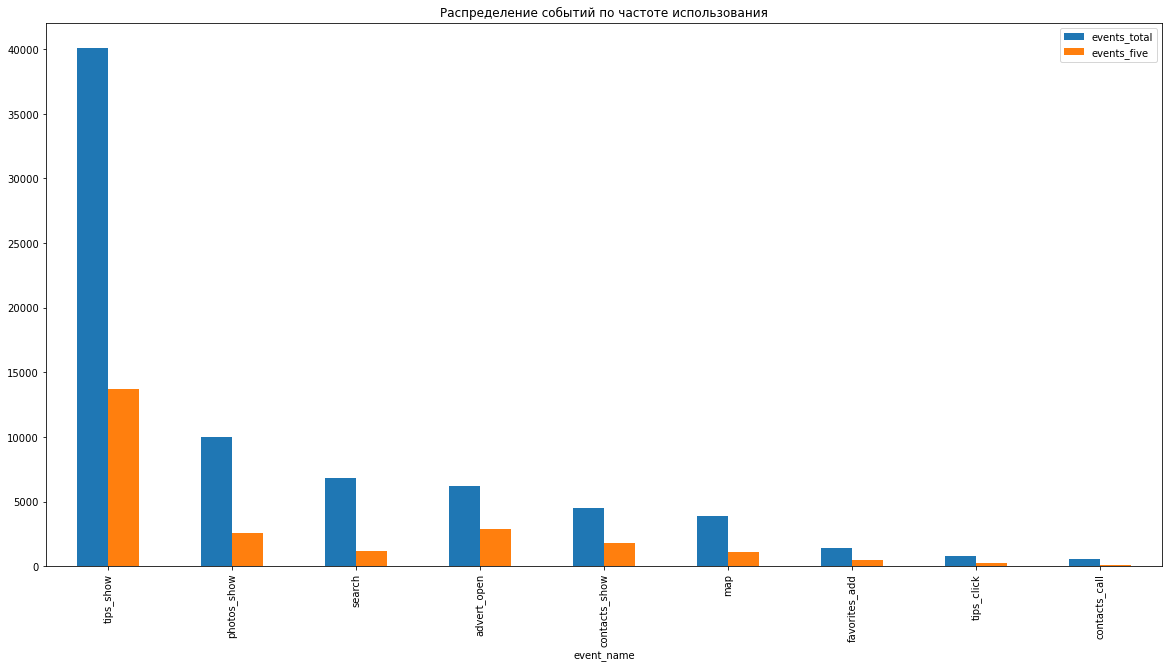

In [33]:
top_events_total.plot(
    x="event_name", y=["events_total", "events_five"], kind="bar", figsize=(20, 10)
)
plt.title('Распределение событий по частоте использования')
plt.legend()
plt.show();

Впечатляет, что на 5% пользователей приходится 47% от общего числа открытий карточек, 40% - просмотров контактов и 35% - добавлений в избранное. Это суперактивные люди, которые при всем при этом дают всего 25% от общего числа просмотров фотографий, 17% - поисковых запросов и 12% - вызовов через приложение. А главное, что настораживает - сумма поисковых запросов и открытых рекомендаций меньше, чем количество просмотров объявлений. Либо главная страница отлично персонализирована, и пользователю можно открывать новые релевантные карточки без дополнительных операций. Либо это тестировщики, разработчики или маркетологи, которые проверяют работу новых функций. Скорей всего среди них есть обычные пользователи, но тогда их доля еще меньше 5%. Также нельзя исключать ошибку - например, повторный учет событий типа `'advert_open'` при подтормаживании интерфейса или некорректной настройке системы учета статистики.

Учитывая высокую вероятность ошибки в данных и ее возможное влияние на дальнейшие расчеты, выводы и рекомендации, исключим пользователей, которые совершили 1 событие, а также 59 и более. Сохраним данные в новый датасет, чтобы в случае необходимости вернуться к первончальному и сравнить результаты вычислений.

In [34]:
users_clear = dataset.groupby('user_id').agg({'event_name':'count'}).query('event_name > 1 and event_name < 59').reset_index()
users_clear_list = users_clear['user_id'].unique()
dataset_filtered = dataset.query('user_id in @users_clear_list').reset_index(drop=True)
dataset_filtered.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:07.039334    tips_show   
3 2019-10-07 00:01:27.770232  advert_open   
4 2019-10-07 00:01:34.804591    tips_show   

                                user_id source        date  weekday  
0  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
1  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
2  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
3  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
4  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0

С учетом фильтрации обновим дополнительный датасет для расчета lifetime.

In [35]:
event_time_filtered = event_time.query('user_id in @users_clear_list').reset_index(drop=True)
event_time_filtered.head()

user_id  event_total  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           35   
1  00463033-5717-4bf1-91b4-09183923b9df           10   
2  004690c3-5a84-4bb7-a8af-e0c8f8fca64e           32   
3  00551e79-152e-4441-9cf7-565d7eb04090            8   
4  00554293-7e00-4122-b898-4e892c4a7c53           11   

                         min                        max  \
0 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
1 2019-11-01 13:54:35.385028 2019-11-01 14:19:17.860053   
2 2019-10-18 22:14:05.555052 2019-10-31 21:42:15.606558   
3 2019-10-25 16:44:41.263364 2019-10-29 02:17:12.342406   
4 2019-10-27 12:32:28.005179 2019-10-27 14:00:25.696036   

                 lifetime  
0 14 days 21:51:06.817844  
1  0 days 00:24:42.475025  
2 12 days 23:28:10.051506  
3  3 days 09:32:31.079042  
4  0 days 01:27:57.690857

In [36]:
df_filtered = event_time_filtered.groupby('event_total').count().reset_index()
fig = px.scatter(df_filtered, x='event_total', y='user_id', title='Распределение событий по пользователям после фильтрации')
fig.show()

Судя по графику, пик приходится на 5 событий - это вполне похоже на правду, если в приложении продаются не товары ежедневного спроса, а покупка по схеме C2C (client-to-client) никогда не бывает быстрой, учитывая необходимость обсудить с продавцом и товар, и стоимость покупки, и условия доставки или забора. Посмотрим, как распределяются события методом `describe()`.

In [37]:
event_time_filtered['event_total'].describe()

count   4,012.00
mean       12.50
std        10.54
min         2.00
25%         5.00
50%         9.00
75%        15.00
max        58.00
Name: event_total, dtype: float64

У нас осталось чуть больше 4000 событий со средним значением 12,5 и медианой на уровне 9. Они достаточно близки, так как выбросы уже не влияют.

Перейдем к анализу времени.

В столбце `'lifetime'` указана разница между последним и первым событиями для каждого пользователя из отфильтрованного датасета. Разброс даже в первых 5 строках довольно существенный, посмотрим на цифры с помощью метода `describe()`.

In [38]:
event_time_filtered['lifetime'].describe()

count                         4012
mean     2 days 07:06:07.982919515
std      4 days 18:14:09.302081092
min         0 days 00:00:00.012021
25%      0 days 00:09:42.103740250
50%      0 days 00:36:55.425198500
75%         1 days 22:10:58.644253
max        26 days 20:45:24.186129
Name: lifetime, dtype: object

Среднее значение составляет больше 2 дней, а медиана - всего 36 минут, что похоже на продолжительность сессии. Посмотрим, как полученные значения распределяются на графике и для этого переведем данные из столбца `'lifetime'` в часы с округлением до целого значения.

In [39]:
def timedelta_to_hours(duration):
    days, seconds = duration.days, duration.seconds
    hours = days * 24 + seconds // 3600
    return hours

In [40]:
event_time_filtered['lifetime_hours'] = event_time_filtered['lifetime'].apply(timedelta_to_hours)
event_time_filtered.head()

user_id  event_total  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           35   
1  00463033-5717-4bf1-91b4-09183923b9df           10   
2  004690c3-5a84-4bb7-a8af-e0c8f8fca64e           32   
3  00551e79-152e-4441-9cf7-565d7eb04090            8   
4  00554293-7e00-4122-b898-4e892c4a7c53           11   

                         min                        max  \
0 2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
1 2019-11-01 13:54:35.385028 2019-11-01 14:19:17.860053   
2 2019-10-18 22:14:05.555052 2019-10-31 21:42:15.606558   
3 2019-10-25 16:44:41.263364 2019-10-29 02:17:12.342406   
4 2019-10-27 12:32:28.005179 2019-10-27 14:00:25.696036   

                 lifetime  lifetime_hours  
0 14 days 21:51:06.817844             357  
1  0 days 00:24:42.475025               0  
2 12 days 23:28:10.051506             311  
3  3 days 09:32:31.079042              81  
4  0 days 01:27:57.690857               1

In [41]:
lifetime_hours = event_time_filtered.groupby('lifetime_hours').count().reset_index()
fig = px.scatter(lifetime_hours, x="lifetime_hours", y="user_id", title='Распределение событий по часам')
fig.show()

In [42]:
event_time_filtered['lifetime_hours'].value_counts()

0      2230
1       187
2        74
3        45
4        36
       ... 
280       1
433       1
503       1
223       1
358       1
Name: lifetime_hours, Length: 419, dtype: int64

Больше половины пользователей в отфильтрованном датасете использовали приложение меньше часа, идущие следом сессии продолжительностью около 1, 2, 3 и 4 часов кратно уменьшаются, а в конце мы видим длинный хвост из единичных значений с аномальным количеством часов. Посмотрим, сколько их.

In [43]:
print(np.percentile(event_time_filtered['lifetime_hours'], [90, 95, 99]))

[196.   334.45 526.89]


10% пользователей из отфильтрованного датасета отмечались в приложении более 8 дней, а 5% - почти 2 недели. Посмотрим, насколько эти пользователи активны.

In [44]:
event_time_filtered.query('lifetime_hours >= 334')['event_total'].describe()

count   203.00
mean     19.92
std      14.29
min       3.00
25%       8.00
50%      16.00
75%      28.00
max      58.00
Name: event_total, dtype: float64

5% пользователей с самыми высокими значениями `'lifetime'` в среднем совершают почти 20 действий за 2 недели, но среди них есть и те, за кем зарегистрированы 3 и 58 событий. Предлагаю считать эти данные выбросами, исключить их и перезаписать датасет.

In [45]:
lifetime_clear = event_time_filtered.query('lifetime_hours < 334')['user_id'].unique()
dataset_filtered = dataset_filtered.query('user_id in @lifetime_clear').reset_index(drop=True)
dataset_filtered.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:07.039334    tips_show   
3 2019-10-07 00:01:27.770232  advert_open   
4 2019-10-07 00:01:34.804591    tips_show   

                                user_id source        date  weekday  
0  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
1  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
2  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
3  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
4  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0

Посмотрим, как изменятся медиана и среднее значение по столбцу `'lifetime'` без аномальных данных.

In [46]:
event_time_filtered.query('lifetime_hours < 334')['lifetime'].describe()

count                         3809
mean     1 days 10:20:20.646143024
std      2 days 21:43:54.674195281
min         0 days 00:00:00.012021
25%         0 days 00:09:07.834643
50%         0 days 00:31:20.329516
75%         1 days 01:36:24.801249
max        13 days 21:38:19.627083
Name: lifetime, dtype: object

Среднее значение уменьшилось вдвое, а медиана практически не изменилась, значит выбросы не так существенны, чтобы их учитывать.

Проверим на графиках с распределением событий и уникальных пользователей по дням недели, не изменились ли ранее установленные тренды.

In [47]:
weekday_pivot_filtered = dataset_filtered.pivot_table(
    index=['event_name'], columns='weekday', values='event_time', aggfunc='count'
)

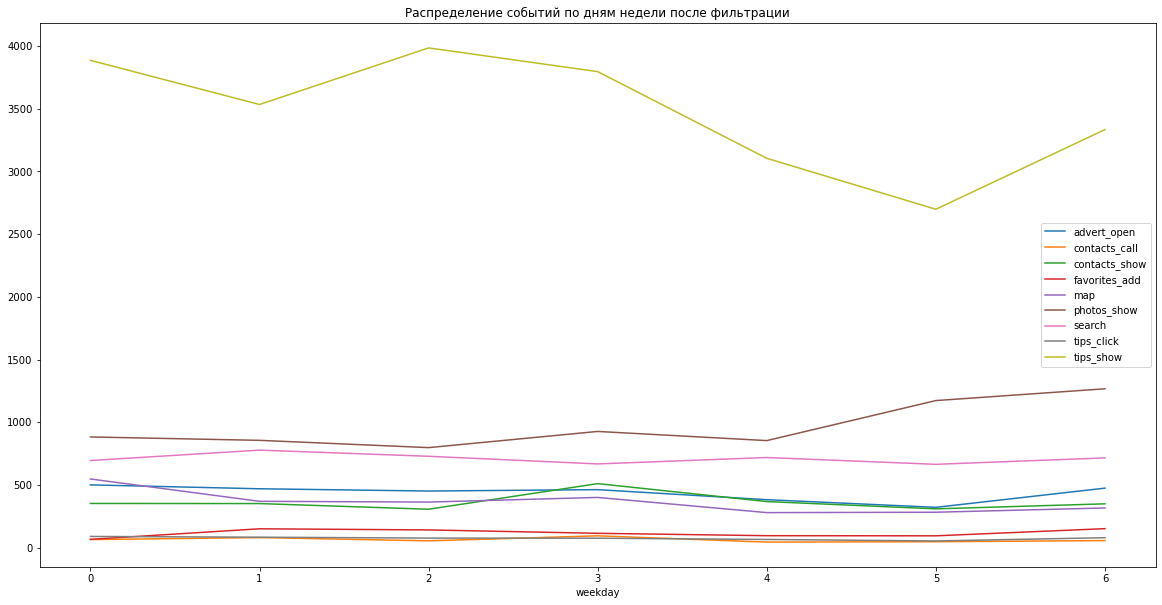

In [48]:
weekday_pivot_filtered.T.plot(figsize=(20, 10))
plt.title('Распределение событий по дням недели после фильтрации')
plt.legend()
plt.show();

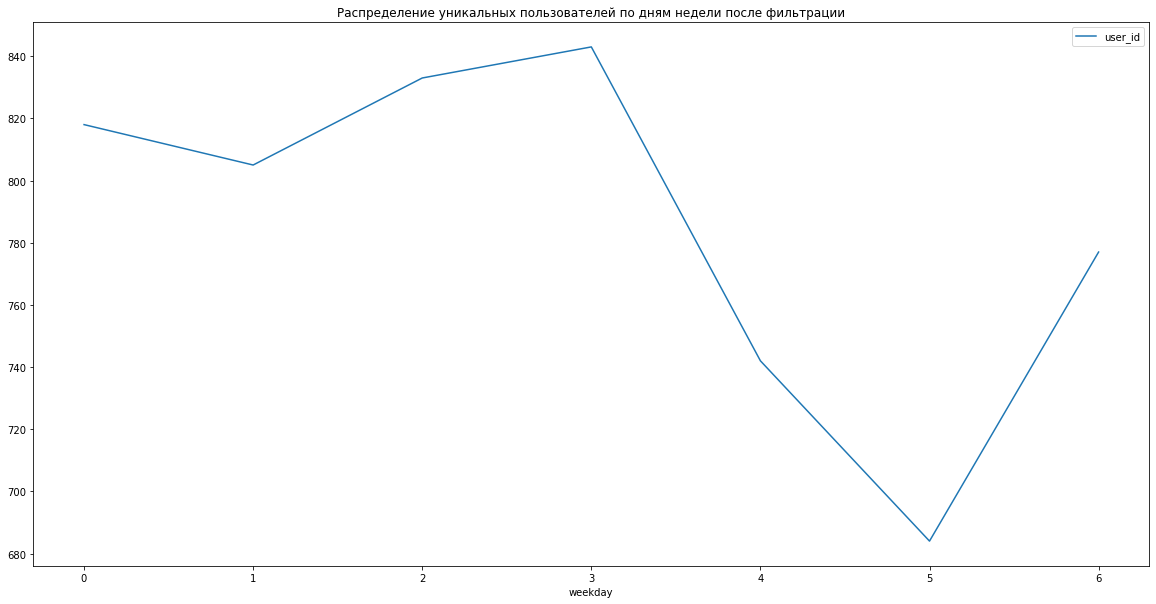

In [49]:
dataset_filtered[['weekday', 'user_id']].groupby('weekday').agg('nunique').plot(figsize=(20, 10))
plt.title('Распределение уникальных пользователей по дням недели после фильтрации')
plt.legend()
plt.show();

Общая динамика схожа с графиками по неочищенным данным, заметно ниже стали значения в понедельник и субботу, а также пятница опустилась ниже воскресенья. Соотвественно, если не считать удаленные данным ошибочными, то можно сделать вывод, что гиперактивные пользователи чаще использовали приложение в понедельник, пятницу и субботу.

В остальном выводы по временным рамкам следующие:
* в датасете представлены данные за неполные 28 дней
* за это время 1,5% пользователей совершили 1 действие, а 5% - 59 и более
* без них среднее значение `'lifetime'` составляет 1 день 10 часов, а медиана - 31 минуту, что похоже на продолжительность 1 сессии.

### Продуктовые метрики. Конверсия

До определения воронок стоит посмотреть на частоту просмотра контактов на 1 уникального пользователя.

In [50]:
print('Частота просмотра контактов на 1 уникального пользователя:',
      dataset['event_name'].loc[dataset['event_name'] == 'contacts_show'].count() / dataset['user_id'].nunique()
)

Частота просмотра контактов на 1 уникального пользователя: 1.0549732122059166


Таким образом, в среднем каждый пользователь, использовавший приложение за отчетный период, просматривает контакты минимум 1 объявления. Это хорошо, но посмотрим, что изменилось после фильтрации.

In [51]:
print('Частота после фильтрации:', '{:.0%}'.format(
    dataset_filtered['event_name'].loc[dataset_filtered['event_name'] == 'contacts_show'].count() / dataset_filtered['user_id'].nunique()
)
)

Частота после фильтрации: 67%


Значение снизилось практически вдвое без гиперактивных пользователей, но оно всё равно очень высокое для целевого действия.

Посмотрим, как эти просмотры распределяются по пользователям.

In [52]:
print('Пользователи, которые выполнили целевое событие:', dataset_filtered.query('event_name == "contacts_show"')['user_id'].nunique())

Пользователи, которые выполнили целевое событие: 817


In [53]:
print('Доля пользователей, которые выполнили целевое событие:',
      '{:.0%}'.format(dataset_filtered.query('event_name == "contacts_show"')['user_id'].nunique() / dataset_filtered['user_id'].nunique()
                     )
     )

Доля пользователей, которые выполнили целевое событие: 21%


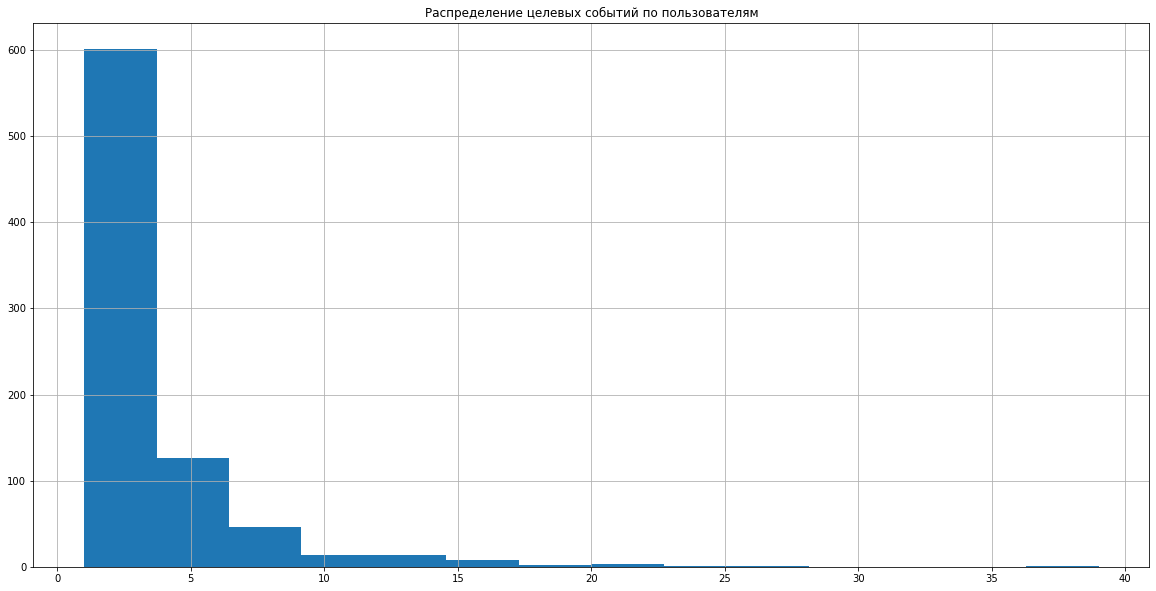

In [54]:
dataset_filtered.query('event_name == "contacts_show"').groupby('user_id')['event_name'].count().hist(bins=14, figsize=(20,10))
plt.title('Распределение целевых событий по пользователям')
plt.show();

21% от общего числа пользователей в очищенных данных просмотрели контакты, из них подавляющее большинство сделали это единожды, но есть и те, кто выполнил целевое действие более 10 раз.

Посмотрим, как конверсия менялась по дням.

In [55]:
conversion_date = dataset_filtered.groupby('date')['user_id'].nunique().reset_index()
contacts_date = dataset_filtered.query('event_name == "contacts_show"').groupby('date')['event_name'].count().reset_index()
conversion_date['contacts_show'] = contacts_date['event_name']
conversion_date['conversion'] = conversion_date['contacts_show'] / conversion_date['user_id']

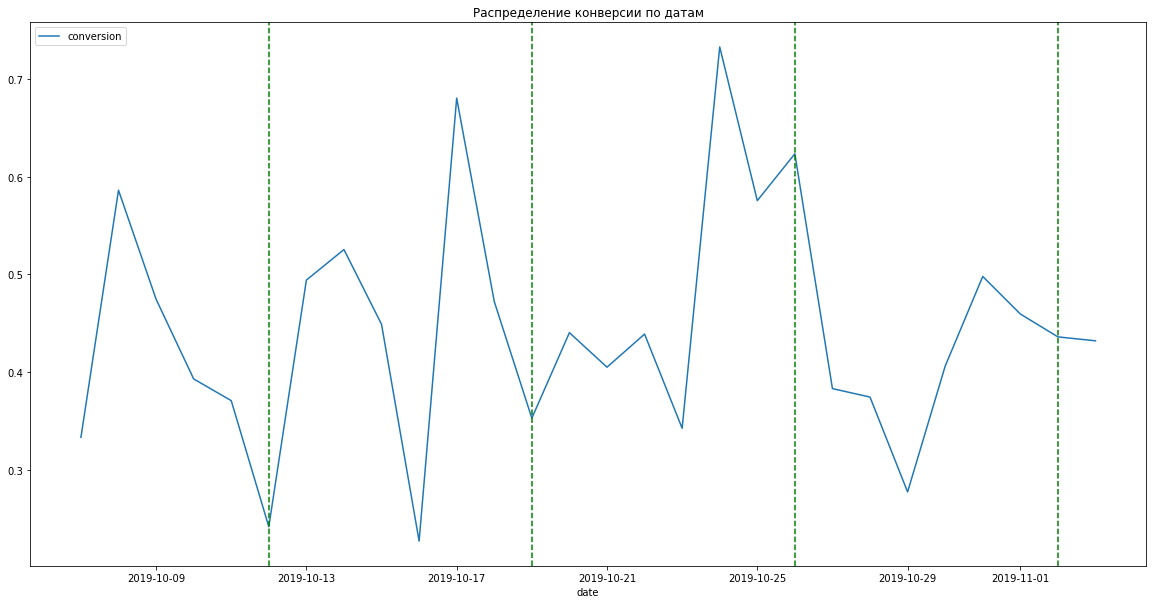

In [56]:
conversion_date.plot(x='date', y='conversion', figsize=(20, 10))
plt.title('Распределение конверсии по датам')
plt.legend()
plt.axvline(x='2019-10-12', color='green', linestyle='--')
plt.axvline(x='2019-10-19', color='green', linestyle='--')
plt.axvline(x='2019-10-26', color='green', linestyle='--')
plt.axvline(x='2019-11-02', color='green', linestyle='--')
plt.show();

Вывод из графика очень простой - маркетологи и разработчики приложения не зря свой хлеб едят, так как по субботам - в дни минимальной активности пользователей - конверсия с каждой неделей всё выше и выше при том, что мы наблюдаем планомерный рост DAU в течение рассматриваемого периода.

Смущает другое - не в субботы, а в другие дни есть более существенные провалы по конверсии, про которые нельзя сказать, что со временем они уменьшаются. Посмотрим, в какие дни наблюдается такая аномалия.

In [57]:
conversion_date.sort_values(by='conversion').head()

date  user_id  contacts_show  conversion
9   2019-10-16      198             45        0.23
5   2019-10-12      124             30        0.24
22  2019-10-29      227             63        0.28
0   2019-10-07      150             50        0.33
16  2019-10-23      251             86        0.34

In [58]:
print(pd.to_datetime('2019-10-16').weekday())
print(pd.to_datetime('2019-10-12').weekday())
print(pd.to_datetime('2019-10-29').weekday())

2
5
1


ТОП 3 среди дат по минимальным значениям конверсии - это среда, суббота и понедельник. Чтобы определить, являются ли эти дни недели устойчивым трендом, посмотрим на распределение.

In [59]:
conversion_weekday = dataset_filtered.groupby('weekday')['user_id'].nunique().reset_index()
contacts_weekday = dataset_filtered.query(
    'event_name == "contacts_show"'
).groupby('weekday')['event_name'].count().reset_index()
conversion_weekday['contacts_show'] = contacts_weekday['event_name']
conversion_weekday['conversion'] = conversion_weekday['contacts_show'] / conversion_weekday['user_id']

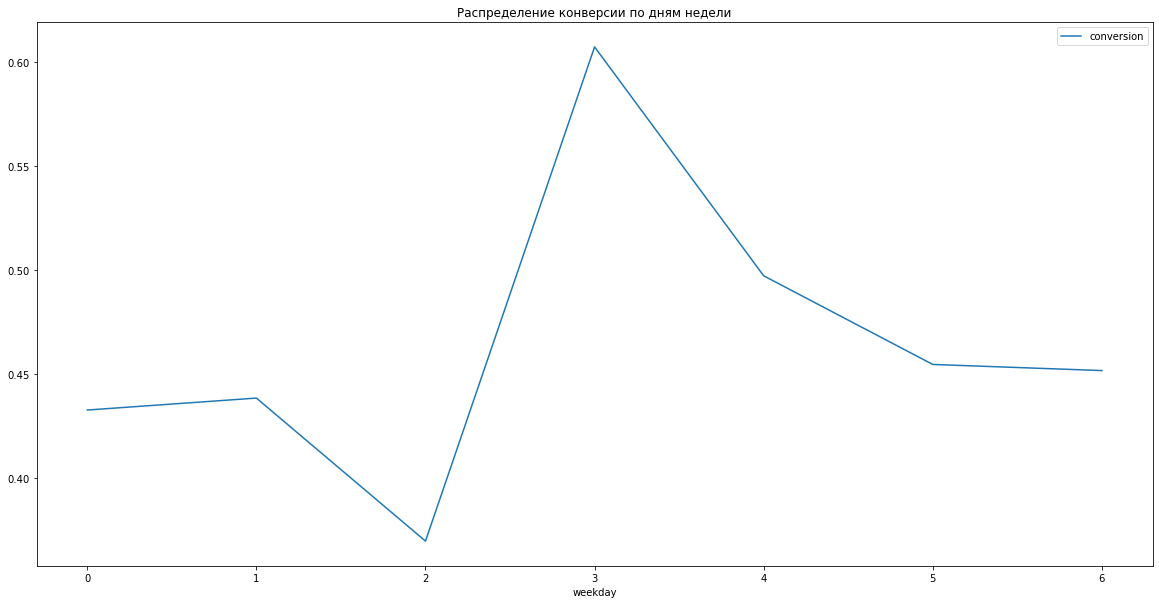

In [60]:
conversion_weekday.plot(x='weekday', y='conversion', figsize=(20, 10))
plt.title('Распределение конверсии по дням недели')
plt.legend()
plt.show();

Вот и объяснение выбранным датам с минимальными значениями. В среду наблюдается минимальная конверсия в целом за рассматриваемый период, также в ТОП 3 с конца списка - понедельник и вторник. Видимо, в начале недели высокие значения по количеству пользователей и просмотру рекомендаций говорят о том, что покупатели присматриваются к объявлениям и делают выбор в последующие дни. Самая высокая конверсия в четверг и пятницу, что объясняет частое нежелание уходить на выходные с незакрытой задачей. 

Резюмируемся по наблюдениям:
* пользователи чаще пользуются приложением в среду и четверг, но лучше всего конвертируются в четверг, хуже - в среду,
* в субботу регистрируется минимальное количество уникальных пользователей и просмотров рекомендаций,
* общая конверсия из уникальных пользователей в целевые события составляет 105%, без выбросов снижается до 67%,
* хотя только 21% от общего числа пользователей (без учета выбросов) совершает целевые события, что близко к закону Парето. 

### Анализ поведения пользователей по источникам

Источники не фигурируют в описании целей и задач проекта, но могут быть полезны для лучшего понимания работы приложения и действий пользователей, поэтому посмотрим на ключевые метрики в этом разрезе.

Сперва сравним, как распределяются пользователи по источникам.

In [61]:
events_source = dataset.groupby('source').agg({'user_id':'nunique', 'event_name':'count'}).reset_index()
events_source

source  user_id  event_name
0  google     1129       20445
1   other     1230       19466
2  yandex     1934       34286

Самые большие группы пользователей и событий регистрируются из источника с меткой `'yandex'`, на втором месте `'other'` - здесь может быть всё, что не относится к поисковым системам или не опознается системой отслеживания статистики: переходы из магазина приложений, баннеры на сайтах и в других приложениях, ссылки в социальных сетях и т.п.

При этом источник с меткой `'google'` дает практически на 10% меньше пользователей, чем `'other'`, но на 5% больше событий. Посмотрим, сколько из них целевых, и какую конверсию показывают разные источники.

In [62]:
events_source_cr = dataset.query('event_name == "contacts_show"').groupby('source').agg(
    {'user_id':'nunique', 'event_name':'count'}
).reset_index()

events_source = events_source.merge(events_source_cr, on='source', how='left', suffixes=('_all', '_aim'))

In [63]:
events_source['cr_user'] = events_source['user_id_aim'] / events_source['user_id_all']
events_source['cr_event'] = events_source['event_name_aim'] / events_source['event_name_all']
events_source

source  user_id_all  event_name_all  user_id_aim  event_name_aim  cr_user  \
0  google         1129           20445          275            1440     0.24   
1   other         1230           19466          228            1054     0.19   
2  yandex         1934           34286          478            2035     0.25   

   cr_event  
0      0.07  
1      0.05  
2      0.06

Конверсии в поисковых системах практически равны, но `'yandex'` за счет большей доли трафика дает больше пользователей, которые совершают целевое действие. При этом у `'google'` самая высокая концентрация просмотров контактов в общей массе событий.

Посмотрим, как распределяются виды событий между источниками.

In [64]:
source_pivot = dataset.pivot_table(index=['source'], columns='event_name', values='event_time', aggfunc='count')
source_pivot

event_name  advert_open  contacts_call  contacts_show  favorites_add   map  \
source                                                                       
google             1621            163           1440            415  1028   
other              1918            152           1054            259   910   
yandex             2625            226           2035            743  1943   

event_name  photos_show  search  tips_click  tips_show  
source                                                  
google             3466    2144         190       9978  
other              2862    1958         228      10125  
yandex             3684    2682         396      19952

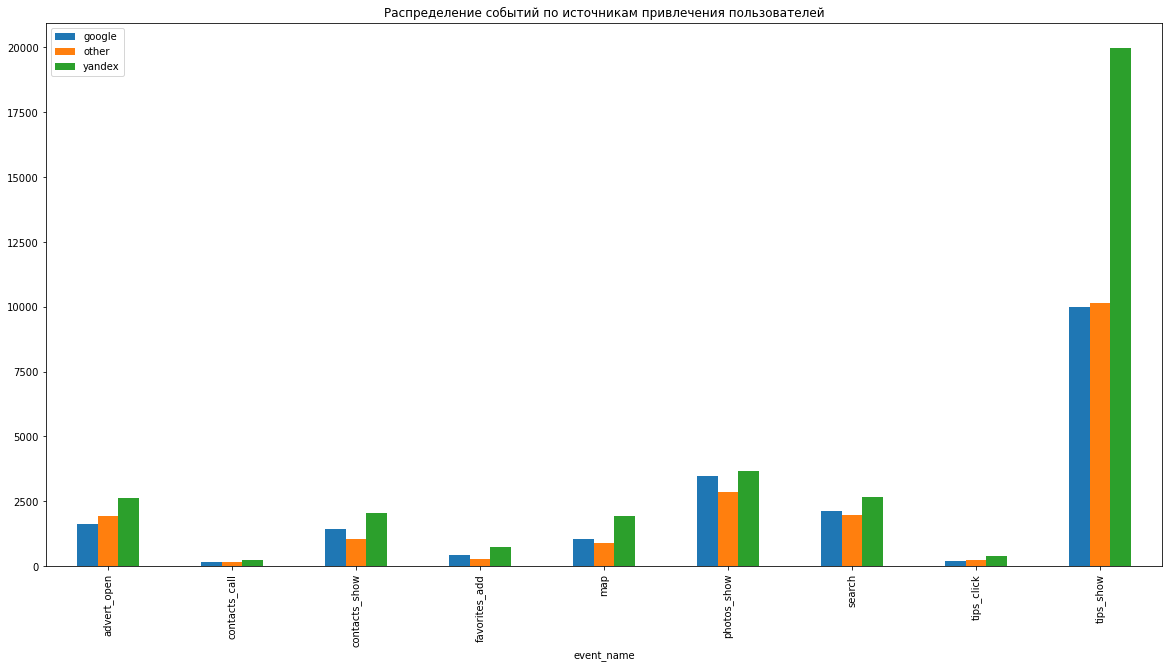

In [65]:
source_pivot.T.plot(kind="bar", figsize=(20, 10)
)
plt.title('Распределение событий по источникам привлечения пользователей')
plt.legend()
plt.show();

Яндекс за счет самого большого объема привлеченных пользователей лидирует во всех видах событий. При этом лучшая конверсия у тех, кто установил приложение из источника `'google'`, позволяет им обходить группу привлеченных из `other'` в таких видах как поиск, добавление в избранное, просмотр фотографий и карты. При этом рейтинг событий по популярности между источниками практически не отличается и соответствует общему порядку.

Остановимся на этом и вернемся к анализу основных данных.

### Подготовка сессий

   * Рассчитать длительность одной сессии и разделить события на сессии
   * Рассчитать lifetime и retention rate

При постановки цели проекта были определены 2 направления:

1. Проанализировать связи целевого события и других действий пользователей
2. Дать оценку действий, которые чаще совершают те пользователи, которые просматривают контакты.

Со вторым пунктом мы технически справились, когда сравнили рейтинги событий между теми, кто совершает целевое действие и не делает этого - списки не отличаются, и порядок по популярности тот же. Но это картина сверху без учета того, что поведение пользователей разбито на сессии - сеансы, за время которых пользователь совершает одно или несколько действий подряд, а потом выходит из приложения.

Чтобы получить инсайты, которые могут быть полезными для разработчиков приложения и маркетологов, нужно посмотреть:

* что чаще всего делают пользователи внутри одной сессии,
* по какой воронке они доходят до целевого события или на чем их путь обрывается,
* имеют ли место быть ассоциированные конверсии, когда пользователи начинают путь до целевого события в одной сессии. а завершают в другой.

Для этого сперва надо рассчитать длительность одной сессии, а потом разделить логи с событиями на сессии.

Ранее мы выяснили, что медиана для столбца `lifetime` в отфильтрованных данных чуть больше 31 минуты - всё это время пользователь может совершать разные действия в приложении без перерыва, а может делать паузы, тогда внутри этого периода появляется несколько сессиий.

Чтобы проверить, предположим, что все события каждой сессии совершаются внутри одних суток. Тогда можно разбить активность всех пользователей на даты и внутри найти самое раннее и самое позднее события, а разница между ними будет близка к продолжительности 1 сессии.

In [66]:
profiles = dataset_filtered.sort_values(by=['user_id', 'event_time']).groupby(['user_id', 'date']).agg(
    {'event_time': ['first', 'last']}
).reset_index()

In [67]:
profiles.columns = ['user_id', 'date', 'first_event', 'last_event']
profiles['session_time'] = profiles['last_event'] - profiles['first_event']
profiles.head()

user_id        date  \
0  00463033-5717-4bf1-91b4-09183923b9df  2019-11-01   
1  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  2019-10-18   
2  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  2019-10-20   
3  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  2019-10-25   
4  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  2019-10-26   

                 first_event                 last_event           session_time  
0 2019-11-01 13:54:35.385028 2019-11-01 14:19:17.860053 0 days 00:24:42.475025  
1 2019-10-18 22:14:05.555052 2019-10-18 22:17:40.719687 0 days 00:03:35.164635  
2 2019-10-20 17:47:18.569612 2019-10-20 17:48:42.169252 0 days 00:01:23.599640  
3 2019-10-25 22:17:31.839852 2019-10-25 22:45:50.328522 0 days 00:28:18.488670  
4 2019-10-26 23:34:21.527526 2019-10-26 23:44:21.330476 0 days 00:09:59.802950

In [68]:
profiles['session_time'].describe()

count                         5703
mean     0 days 01:06:00.442050911
std      0 days 02:43:00.442610326
min                0 days 00:00:00
25%      0 days 00:02:59.608530500
50%         0 days 00:11:18.720286
75%      0 days 00:37:27.456264500
max         0 days 23:37:28.666352
Name: session_time, dtype: object

Среднее значение в 5 раз выше медианы - это существенная разница. При этом в датасете появились сессии с нулевой длительностью, хотя ранее мы исключили пользователей, которые совершили 1 действие. Посмотрим, сколько их.

In [69]:
print(
    'Количество сессий с нулевой длительностью:',
    profiles['user_id'].loc[profiles['session_time'] == profiles['session_time'].min()].count()
)
print(
    'Доля сессий с нулевой длительностью:',
    '{:.2%}'.format(
        profiles['user_id'].loc[profiles['session_time'] == profiles['session_time'].min()]
        .count() / profiles['user_id'].count())
)
print(
    'Количество уникальных пользователей с нулевой длительностью сессий:',
    profiles['user_id'].loc[profiles['session_time'] == profiles['session_time'].min()].nunique()
)
print(
    'Количество уникальных пользователей с нулевой длительностью сессий:',
    '{:.2%}'.format(
        profiles['user_id'].loc[profiles['session_time'] == profiles['session_time'].min()]
        .nunique() / profiles['user_id'].count())
)

Количество сессий с нулевой длительностью: 589
Доля сессий с нулевой длительностью: 10.33%
Количество уникальных пользователей с нулевой длительностью сессий: 465
Количество уникальных пользователей с нулевой длительностью сессий: 8.15%


Доля таких сессий больше 10%. Если это сессии с событиями, произошедшими до и после полуночи, то долю практически можно сократить вдвое. Сделать это нам не позволяет более высокая доля уникальных пользователей выше 8%. Тем не менее, это уже меньше, чем 10%, и можно ими пренебречь для промежуточных выводов.

Переведем сессии в секунды для удобства сравнения, а затем исключим нулевые и 10% пользователей с самыми длинными сессиями, чтобы исключить их влияние на выводы. 

In [70]:
def timedelta_to_minutes(duration):
    days, seconds = duration.days, duration.seconds
    minutes = days * 0 + seconds // 60
    return minutes

In [71]:
profiles['session_duration'] = profiles['session_time'].apply(timedelta_to_minutes)

In [72]:
print(np.percentile(profiles['session_duration'], [90, 95, 99]))

[175.   384.9  823.98]


In [73]:
profiles.query('session_duration > 0 and session_duration < 175')['session_duration'].describe()

count   4,183.00
mean       25.41
std        33.07
min         1.00
25%         5.00
50%        13.00
75%        30.00
max       174.00
Name: session_duration, dtype: float64

Разница между средним значением и медианой существенно уменьшилась, но разброс значений по-прежнему большой, чтобы однозначно установить длину 1 сессии. Посмотрим, какую долю составляют пользоваьтели, которые совершили 2 события и какая между ними разница по времени, чтобы решить, можно ли использовать их как ориентир для разбивки всех данных на сессии.

In [74]:
event_time_filtered

user_id  event_total  \
0     0001b1d5-b74a-4cbf-aeb0-7df5947bf349           35   
1     00463033-5717-4bf1-91b4-09183923b9df           10   
2     004690c3-5a84-4bb7-a8af-e0c8f8fca64e           32   
3     00551e79-152e-4441-9cf7-565d7eb04090            8   
4     00554293-7e00-4122-b898-4e892c4a7c53           11   
...                                    ...          ...   
4007  ff82c7c7-16d6-44b1-833b-a217747b0b02           52   
4008  ffab8d8a-30bb-424a-a3ab-0b63ebbf7b07           17   
4009  ffc01466-fdb1-4460-ae94-e800f52eb136            7   
4010  ffcf50d9-293c-4254-8243-4890b030b238            2   
4011  ffe68f10-e48e-470e-be9b-eeb93128ff1a           13   

                            min                        max  \
0    2019-10-07 13:39:45.989359 2019-10-22 11:30:52.807203   
1    2019-11-01 13:54:35.385028 2019-11-01 14:19:17.860053   
2    2019-10-18 22:14:05.555052 2019-10-31 21:42:15.606558   
3    2019-10-25 16:44:41.263364 2019-10-29 02:17:12.342406   
4    2019-10-27 12:32:28.005179 2019-10-27 14:00:25.696036   
...                         ...                        ...   
4007 2019-10-15 23:41:07.647658 2019-10-30 20:59:41.591914   
4008 2019-10-13 16:11:27.414960 2019-10-26 19:53:51.993545   
4009 2019-10-07 20:32:49.997044 2019-10-07 20:33:42.135500   
4010 2019-10-23 11:51:35.199237 2019-10-23 11:52:55.577369   
4011 2019-10-21 16:39:33.867145 2019-10-28 07:17:52.646652   

                    lifetime  lifetime_hours  
0    14 days 21:51:06.817844             357  
1     0 days 00:24:42.475025               0  
2    12 days 23:28:10.051506             311  
3     3 days 09:32:31.079042              81  
4     0 days 01:27:57.690857               1  
...                      ...             ...  
4007 14 days 21:18:33.944256             357  
4008 13 days 03:42:24.578585             315  
4009  0 days 00:00:52.138456               0  
4010  0 days 00:01:20.378132               0  
4011  6 days 14:38:18.779507             158  

[4012 rows x 6 columns]

In [75]:
print(
    'Доля уникальных пользователей, которые совершили 2 события:',
    '{:.2%}'.format(event_time_filtered.query(
        'event_total == 2'
    )['event_total'].count() / event_time_filtered['user_id'].count())
     )

Доля уникальных пользователей, которые совершили 2 события: 1.79%


In [76]:
event_time_filtered.query('event_total == 2')['lifetime'].describe()

count                           72
mean     0 days 05:12:13.203862583
std      1 days 00:21:42.906541094
min         0 days 00:00:00.012021
25%         0 days 00:00:24.969149
50%      0 days 00:01:25.773325500
75%      0 days 00:05:25.860708750
max         6 days 23:30:21.864545
Name: lifetime, dtype: object

Доля пользователей, которые совершили 2 события, меньше 2% и разброс по времени между ними большой: от нескольких милисекунд до 7 дней, а медиана проходит на отметке около 1,5 часов. Сложно представить предложение с объявлениями о продаже товаров, где можно было бы провести столько времени. Правда, возможно, учитывается всё время, пока приложение не было закрыто после запуска, а часть этого времени они могло быть скрыто в трее и не использовалось по факту.

Другими словами, эти данные лучше проигнорировать, чем использовать.

Поэтому пойдем от противного и установим время между сессиями, как способ разделить все события на воронки или всё те же сессии.

В системах учета пользовательской активности Яндекс.Метрика и Google Analytics чаще всего для этого выставляют задержку в 30 минут. Многие сайты определяют отсутствие активности за это время как сигнал для отмены авторизации пользователя и требуют заново подключиться.

Используем 30 минут отсутствия новых событий как сигнал для завершения предыдущей и начала новой сессий.

In [77]:
# сохраним в новый датасет сортировку событий по времени внутри каждого пользователя и обновим индекс
df = dataset_filtered.sort_values(by=['user_id', 'event_time']).reset_index(drop=True)
df.head(20)

event_time   event_name  \
0  2019-11-01 13:54:35.385028  photos_show   
1  2019-11-01 13:56:50.278231  photos_show   
2  2019-11-01 14:00:18.198982  photos_show   
3  2019-11-01 14:01:36.913083  photos_show   
4  2019-11-01 14:02:45.542136  photos_show   
5  2019-11-01 14:04:05.754227  photos_show   
6  2019-11-01 14:05:08.302108  photos_show   
7  2019-11-01 14:08:52.786969  photos_show   
8  2019-11-01 14:17:51.724034  photos_show   
9  2019-11-01 14:19:17.860053  photos_show   
10 2019-10-18 22:14:05.555052       search   
11 2019-10-18 22:14:16.960831       search   
12 2019-10-18 22:17:40.719687          map   
13 2019-10-20 17:47:18.569612       search   
14 2019-10-20 17:47:19.889629       search   
15 2019-10-20 17:47:38.353167       search   
16 2019-10-20 17:47:42.437735       search   
17 2019-10-20 17:48:42.169252    tips_show   
18 2019-10-25 22:17:31.839852       search   
19 2019-10-25 22:25:09.446658       search   

                                 user_id  source        date  weekday  
0   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
1   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
2   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
3   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
4   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
5   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
6   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
7   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
8   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
9   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4  
10  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-18        4  
11  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-18        4  
12  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-18        4  
13  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6  
14  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6  
15  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6  
16  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6  
17  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6  
18  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-25        4  
19  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-25        4

In [78]:
# найдем разрывы по времени между событиями продолжительность 30 и более минут и пронумеруем внутри каждого пользователя
g = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta('30Min')).cumsum()
g.head(20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    1
15    1
16    1
17    1
18    2
19    2
Name: event_time, dtype: int32

In [79]:
# добавим нумерацию сессий в новый датасет
df['session_id'] = df.groupby(['user_id', g], sort=False).ngroup() + 1
df.head(20)

event_time   event_name  \
0  2019-11-01 13:54:35.385028  photos_show   
1  2019-11-01 13:56:50.278231  photos_show   
2  2019-11-01 14:00:18.198982  photos_show   
3  2019-11-01 14:01:36.913083  photos_show   
4  2019-11-01 14:02:45.542136  photos_show   
5  2019-11-01 14:04:05.754227  photos_show   
6  2019-11-01 14:05:08.302108  photos_show   
7  2019-11-01 14:08:52.786969  photos_show   
8  2019-11-01 14:17:51.724034  photos_show   
9  2019-11-01 14:19:17.860053  photos_show   
10 2019-10-18 22:14:05.555052       search   
11 2019-10-18 22:14:16.960831       search   
12 2019-10-18 22:17:40.719687          map   
13 2019-10-20 17:47:18.569612       search   
14 2019-10-20 17:47:19.889629       search   
15 2019-10-20 17:47:38.353167       search   
16 2019-10-20 17:47:42.437735       search   
17 2019-10-20 17:48:42.169252    tips_show   
18 2019-10-25 22:17:31.839852       search   
19 2019-10-25 22:25:09.446658       search   

                                 user_id  source        date  weekday  \
0   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
1   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
2   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
3   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
4   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
5   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
6   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
7   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
8   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
9   00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
10  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-18        4   
11  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-18        4   
12  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-18        4   
13  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
14  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
15  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
16  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
17  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
18  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-25        4   
19  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-25        4   

    session_id  
0            1  
1            1  
2            1  
3            1  
4            1  
5            1  
6            1  
7            1  
8            1  
9            1  
10           2  
11           2  
12           2  
13           3  
14           3  
15           3  
16           3  
17           3  
18           4  
19           4

In [80]:
df.nunique()

event_time    46094
event_name        9
user_id        3809
source            3
date             28
weekday           7
session_id     7103
dtype: int64

Итак, в получившемся датасете 46094 событий разбиты на 7103 сессии для 3809 уникальных пользователей. Чтобы убедиться, что период для разбивки выбран верно, сделаем то же самое для 10 минут и 1 часа. 

In [81]:
g_10 = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta('10Min')).cumsum()
df['session_id_10'] = df.groupby(['user_id', g_10], sort=False).ngroup() + 1

In [82]:
g_60 = (df.groupby('user_id')['event_time'].diff() > pd.Timedelta('60Min')).cumsum()
df['session_id_60'] = df.groupby(['user_id', g_60], sort=False).ngroup() + 1

In [83]:
print('Разница в сессиях с разбивкой на 10 и 30 минут:', '{:.2%}'.format(
    df['session_id_10'].nunique() / df['session_id'].nunique() - 1)
     )

Разница в сессиях с разбивкой на 10 и 30 минут: 19.92%


In [84]:
print('Разница в сессиях с разбивкой на 30 и 60 минут:', '{:.2%}'.format(
    df['session_id'].nunique() / df['session_id_60'].nunique() - 1)
     )

Разница в сессиях с разбивкой на 30 и 60 минут: 6.70%


В первом случае разница гораздо больше, а значит разбивка на сессии чувствительна к уменьшению времени между крайними событиями. Сохраним первоначальное деление с паузой в 30 минут как основное, но не будет удалять данные, чтобы в случае необходимости сравнить воронки между ними.

Посмотрим, как распределяются:
* события по сессиям
* сессии по пользователям
* сессии по всему периоду наблюдений.

In [85]:
df.groupby('session_id')['event_name'].count().describe()

count   7,103.00
mean        6.49
std         6.85
min         1.00
25%         2.00
50%         4.00
75%         8.00
max        57.00
Name: event_name, dtype: float64

Максимум для количества событий на одного пользователя мы установили выше и здесь нет ничего удивительного - смущает, что в данных появились сессии из 1 события, а значит либо время для разбивки сессий выбрано неверно, либо есть группа пользователей, которая открывает приложение и совершает одно событие, чтобы потом отключиться и вернуться спустя более, чем через полчаса. Посмотрим, сколько сессий из 1 события.

In [86]:
df.groupby('session_id')['event_name'].count().value_counts().head()

1    1281
2     909
4     739
3     727
5     605
Name: event_name, dtype: int64

In [87]:
events_session = df.groupby(['user_id', 'session_id'])['event_name'].count().reset_index()
print('Доля событий от общего числа в сессиях из 1 события:', '{:.0%}'.format(
    events_session.query('event_name == 1')['user_id'].nunique() / events_session['user_id'].nunique())
     )

Доля событий от общего числа в сессиях из 1 события: 21%


21% от общего числа пользователей - это существенно, но также важно, какую долю событий мы теряем, исключая эти сессии из дальнейшего анализа. Посмотрим на них.

In [88]:
events_session_list = events_session.query('event_name == 1')['session_id'].unique()
print('Доля событий от общего числа в сессиях из 1 события:', '{:.2%}'.format(
    len(events_session_list) / df['event_name'].count())
     )
df.query('session_id in @events_session_list')['event_name'].value_counts()

Доля событий от общего числа в сессиях из 1 события: 2.78%


tips_show        499
photos_show      337
search           253
contacts_show     90
map               51
advert_open       25
favorites_add     19
tips_click         7
Name: event_name, dtype: int64

Исключив записи о сессиях из 1 события, мы потеряем менее 3% данных. Важно, что, во-первых, в датасете останутся сессии, из которых можно строить цепочки и воронки, а во-вторых, в списке событий останутся все записи о событиях вида `'contacts_call'` - с точки зрения процесса и бизнеса, это вершина воронки, хотя описанием данных установлено другое целевое событие.

Сохраним записи без сессий из 1 события и дополнительных столбцов с расчетом сессий в новый датасет.

In [89]:
df_filtered = df.query('session_id not in @events_session_list').reset_index(drop=True)
df_filtered = df_filtered.drop(['session_id_10', 'session_id_60'], axis=1)
df_filtered.head()

event_time   event_name  \
0 2019-11-01 13:54:35.385028  photos_show   
1 2019-11-01 13:56:50.278231  photos_show   
2 2019-11-01 14:00:18.198982  photos_show   
3 2019-11-01 14:01:36.913083  photos_show   
4 2019-11-01 14:02:45.542136  photos_show   

                                user_id  source        date  weekday  \
0  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
1  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
2  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
3  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
4  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   

   session_id  
0           1  
1           1  
2           1  
3           1  
4           1

Датасет с сессиями готов для анализа, перед которым стоит попробовать рассчитать retention.

### Retention rate

Напомню, что ранее мы выяснили, что среднее значение lifetime или разницы между первым и последним событием в исходном датасете колеблется от 30 минут до 3 дней, но у нас не было в распоряжении даты регистрации или первого запуска пользователем приложения, поэтому эти данные использовать было бы некорректно. Так как сам по себе retention rate на основе когортного анализа не участвует напрямую в ответе на ключевые вопросы проекта, а скорее раскрывает видение ситуации в целом и позволяет лучше оценить работу приложения, то укрупним задачу и остановимся на сроке жизни пользователя в приложении длиной в 14 дней. 

In [90]:
# создадим новый датасет с профилями пользователей, где использует время первого события как дату регистрации/запуска приложения

profiles_rr = df_filtered.groupby('user_id').agg({'event_time':'first'}).reset_index()
profiles_rr.columns = ['user_id', 'first_ts']
profiles_rr['dt'] = pd.to_datetime(profiles_rr['first_ts']).dt.date
profiles_rr.head()

user_id                   first_ts          dt
0  00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35.385028  2019-11-01
1  004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:05.555052  2019-10-18
2  00551e79-152e-4441-9cf7-565d7eb04090 2019-10-25 16:44:41.263364  2019-10-25
3  00554293-7e00-4122-b898-4e892c4a7c53 2019-10-27 12:32:28.005179  2019-10-27
4  005fbea5-2678-406f-88a6-fbe9787e2268 2019-10-11 11:22:54.442841  2019-10-11

In [91]:
# сгруппируем сессии по пользователям в другой датасет
sessions = df_filtered.groupby(['session_id', 'user_id']).agg({'event_time':'first'}).reset_index()
sessions.columns = ['session_id', 'user_id', 'session_start']
sessions.head()

session_id                               user_id              session_start
0           1  00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35.385028
1           2  004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:05.555052
2           3  004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-20 17:47:18.569612
3           4  004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-25 22:17:31.839852
4           5  004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-26 23:34:21.527526

In [92]:
# зададим функцию для расчета retention
def get_retention(
    profiles, sessions, observation_date, horizon_days, ignore_horizon=False
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # рассчитываем удержание
    result_grouped = result_raw.pivot_table(
        index=['dt'], columns='lifetime', values='user_id', aggfunc='nunique'
    )
    cohort_sizes = (
        result_raw.groupby('dt')
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'cohort_size'})
    )
    result_grouped = cohort_sizes.merge(
        result_grouped, on='dt', how='left'
    ).fillna(0)
    result_grouped = result_grouped.div(result_grouped['cohort_size'], axis=0)

    # исключаем все лайфтаймы, превышающие горизонт анализа
    result_grouped = result_grouped[
        ['cohort_size'] + list(range(horizon_days))
    ]

    # восстанавливаем столбец с размерами когорт
    result_grouped['cohort_size'] = cohort_sizes

    # возвращаем таблицу удержания и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped

In [93]:
retention_raw, retention = get_retention(
    profiles_rr, sessions, profiles_rr['dt'].max(), 14
)

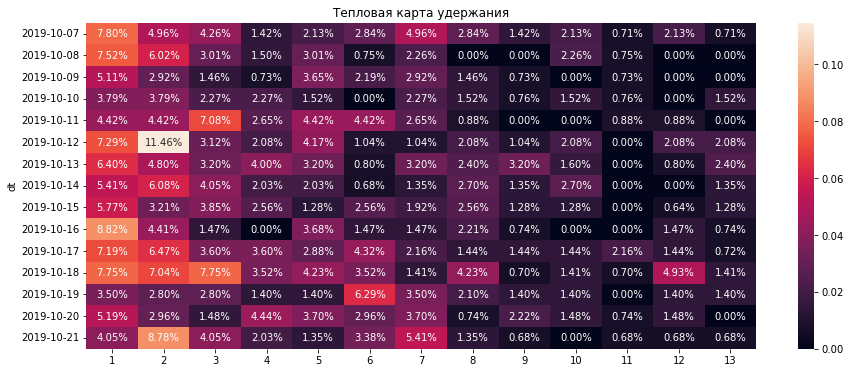

In [94]:
# строим тепловую карту для наглядности 

plt.figure(figsize=(15, 6))
sns.heatmap(
    retention.drop(columns=['cohort_size', 0]),
    annot=True,
    fmt='.2%',
)
plt.title('Тепловая карта удержания')
plt.show()

Только 4 когорты из 15 не удерживают пользователей до горизонта анализа, остальные мало того, что показывают долю до 2,4%, но и в большинстве случаев успевают реанимировать и вернуть часть активных пользователей, растерянных за вторую половину наблюдений. При чем лучше всего удерживают пользователей когорты с не самыми высокими показателями в первые дни - например, от 12 и 13 октября. Сравним впечатления с кривыми удержания.

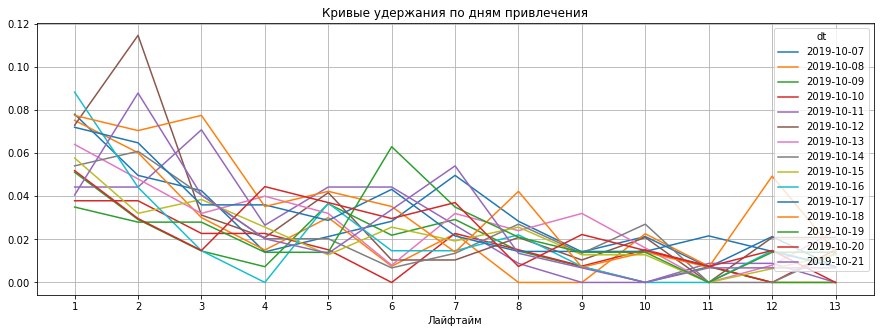

In [95]:
# строим кривые удержания

report = retention.drop(columns = ['cohort_size', 0])

report.T.plot(
    grid=True,  # добавляем сетку
    xticks=list(report.columns.values),  # отметки на оси X — названия колонок
    figsize=(15, 5),  # размер графика
)
plt.xlabel('Лайфтайм')  # название оси X
plt.title('Кривые удержания по дням привлечения')  # название графика
plt.show()

Кривые удержания подтверждают, что в целом есть общее снижение активности со временем, но поведение пользователей во многих когортах хаотично - они могут увеличивать retention rate кратно после падения, пусть и на считанные дни. Отсюда можно сделать вывод, что в приложении совершаются чаще импульсные действия и покупки, чем плановые, и не хватает механизмов по удержанию, которые задавали бы определенные (читай, управляемые) тренды между разными когортами.

&uarr; [Структура исследования](#Структура-исследования)

## Анализ поведения пользователей

Задачи анализа:

1. Выделить события, которые совершают пользователи вместе с целевым событием
   * Выделить сессии с целевым событием и определить другие события в них
   * Показать распределение вспомогательных событий на графике
2. Проанализировать, часто ли эти события бывают самостоятельными или составляют какую-то воронку
   * Выделить сессии без целевого действия и определить события в них
   * Определить порядок событий для составления воронки (воронок)
3. Проанализировать, за какое время до целевого события совершаются вспомогательные события
   * Рассчитать разницу между целевым и вспомогательным событием в рамках 1 сессии и для разных сессий 1 пользователя

Сперва посмотрим, сколько событий в итоговом датасете и что представляют из себя данные.

In [96]:
df_filtered.nunique()

event_time    44813
event_name        9
user_id        3795
source            3
date             28
weekday           7
session_id     5822
dtype: int64

In [97]:
df_filtered.head()

event_time   event_name  \
0 2019-11-01 13:54:35.385028  photos_show   
1 2019-11-01 13:56:50.278231  photos_show   
2 2019-11-01 14:00:18.198982  photos_show   
3 2019-11-01 14:01:36.913083  photos_show   
4 2019-11-01 14:02:45.542136  photos_show   

                                user_id  source        date  weekday  \
0  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
1  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
2  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
3  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   
4  00463033-5717-4bf1-91b4-09183923b9df  yandex  2019-11-01        4   

   session_id  
0           1  
1           1  
2           1  
3           1  
4           1

У нас в распоряжении почти 45 000 событий на 5822 сессии от 3795 уникальных пользователей. Стоит заметить, что данные представлены за все 28 дней, значит выборка достаточно репрезентативная для последующего анализа.

Создадим сводную таблицу, где сессии будут индексом, а виды событий столбцами, чтобы посмотреть на цепочки событий сверху.  

In [98]:
df_filtered.pivot_table(index=['session_id'], columns='event_name', values='event_time', aggfunc='count').head(20)

event_name  advert_open  contacts_call  contacts_show  favorites_add  map  \
session_id                                                                  
1                   NaN            NaN            NaN            NaN  NaN   
2                   NaN            NaN            NaN            NaN 1.00   
3                   NaN            NaN            NaN            NaN  NaN   
4                   NaN            NaN            NaN            NaN 2.00   
5                  5.00            NaN            NaN            NaN 1.00   
6                   NaN            NaN            NaN            NaN  NaN   
7                   NaN            NaN            NaN            NaN 2.00   
8                   NaN           1.00           1.00            NaN  NaN   
9                   NaN           2.00           2.00            NaN  NaN   
11                  NaN            NaN            NaN            NaN  NaN   
12                  NaN            NaN            NaN            NaN  NaN   
13                  NaN            NaN           3.00            NaN  NaN   
14                  NaN            NaN            NaN            NaN  NaN   
15                  NaN            NaN            NaN            NaN  NaN   
16                  NaN            NaN            NaN            NaN  NaN   
18                  NaN            NaN            NaN            NaN  NaN   
19                  NaN            NaN            NaN            NaN  NaN   
20                  NaN            NaN           2.00            NaN 2.00   
21                  NaN            NaN            NaN            NaN  NaN   
22                  NaN            NaN           1.00            NaN  NaN   

event_name  photos_show  search  tips_click  tips_show  
session_id                                              
1                 10.00     NaN         NaN        NaN  
2                   NaN    2.00         NaN        NaN  
3                   NaN    4.00         NaN       1.00  
4                   NaN    2.00         NaN        NaN  
5                   NaN    2.00         NaN       3.00  
6                   NaN    4.00         NaN        NaN  
7                   NaN    3.00         NaN        NaN  
8                   NaN     NaN         NaN        NaN  
9                   NaN    1.00         NaN        NaN  
11                  NaN    2.00         NaN       6.00  
12                  NaN     NaN         NaN       3.00  
13                  NaN     NaN         NaN       2.00  
14                 5.00     NaN         NaN        NaN  
15                 6.00     NaN         NaN        NaN  
16                 5.00     NaN         NaN        NaN  
18                14.00     NaN         NaN        NaN  
19                 1.00    2.00         NaN        NaN  
20                  NaN     NaN         NaN       5.00  
21                  NaN     NaN         NaN       8.00  
22                  NaN   11.00         NaN        NaN

На первый взгляд:
* в датасете цепочки в основном составлены из 2-3 повторяющихся событий,
* сессии преимущественно состоят из запросов к карте и поиску (при чем они редко дополнены просмотром контактов)
* реже сессии включают только события одного вида (например, просмотр фото или рекомендаций).

Посмотрим, много ли последних и какие виды событий собраны в таких сессиях.

In [99]:
events_count = df_filtered.groupby('session_id').agg({'event_name':'nunique'}).reset_index()
events_one_series = events_count.query('event_name == 1')['session_id'].unique()

print('Количество сессий с событиями 1 вида:', len(events_one_series))
print('Доля сессий с событиями 1 вида:', '{:.0%}'.format(len(events_one_series) / df_filtered['session_id'].nunique()))
print('Количество событий в таких сессиях:',
      df_filtered.query('session_id in @events_one_series')['event_name'].count())
print('Доля событий в сессиях с событиями 1 вида:', '{:.0%}'.format(
    df_filtered.query('session_id in @events_one_series')['event_name'].count() / df_filtered['event_name'].count()))
print('Доля пользователей с событиями 1 вида:', '{:.0%}'.format(
    df_filtered.query('session_id in @events_one_series')['user_id'].nunique() / df_filtered['user_id'].nunique()))

df_filtered.query('session_id in @events_one_series')['event_name'].value_counts()

Количество сессий с событиями 1 вида: 2277
Доля сессий с событиями 1 вида: 39%
Количество событий в таких сессиях: 13042
Доля событий в сессиях с событиями 1 вида: 29%
Доля пользователей с событиями 1 вида: 44%


tips_show        8477
photos_show      2805
search            886
advert_open       390
contacts_show     258
map                99
favorites_add      83
tips_click         44
Name: event_name, dtype: int64

39% сессий состоит исключительно из событий одного вида, где больше половины составляют просмотры рекомендаций (читай, скроллинг одной из страниц в приложении), пятую часть - просмотры фотографий (видимо, открытие галереи возможно без открытия карточек - иногда такие подборки размещают на главной странице) и чуть больше 5% - поиск, видимо, безуспешный. Смущает, что в этом списке находятся клики по рекомендациям без их просмотра и просмотры контактов, хотя пуши из приложения могут позволять перейти в избранное или историю просмотров, где могут быть сохранены эти данные.

Так или иначе, но по этим сессиям невозможно сделать какие-либо выводы о влиянии одних событий на целевое или другие, поэтому дальше стоит рассматривать датасет без них.

In [100]:
df_final = df_filtered.query('session_id not in @events_one_series').reset_index(drop=True)
df_final['event_name'].value_counts()

tips_show        15363
search            3838
photos_show       3623
advert_open       2658
map               2420
contacts_show     2210
favorites_add      723
tips_click         483
contacts_call      453
Name: event_name, dtype: int64

Итак, вот все события из датасета, где каждая сессия содержит 2 и более событий разных видов, а значит между ними можно установить связи. Пронумеруем все оставшиеся события внутри каждой сессии в хронологическом порядке и посмотрим на первые 20 строк.

In [101]:
df_final['event_id'] = df_final.groupby('session_id').cumcount().add(1)
df_final.head(20)

event_time   event_name  \
0  2019-10-18 22:14:05.555052       search   
1  2019-10-18 22:14:16.960831       search   
2  2019-10-18 22:17:40.719687          map   
3  2019-10-20 17:47:18.569612       search   
4  2019-10-20 17:47:19.889629       search   
5  2019-10-20 17:47:38.353167       search   
6  2019-10-20 17:47:42.437735       search   
7  2019-10-20 17:48:42.169252    tips_show   
8  2019-10-25 22:17:31.839852       search   
9  2019-10-25 22:25:09.446658       search   
10 2019-10-25 22:40:13.838694          map   
11 2019-10-25 22:45:50.328522          map   
12 2019-10-26 23:34:21.527526       search   
13 2019-10-26 23:34:24.444379       search   
14 2019-10-26 23:37:16.862065    tips_show   
15 2019-10-26 23:43:02.273224    tips_show   
16 2019-10-26 23:44:21.330476    tips_show   
17 2019-10-27 00:07:32.519908          map   
18 2019-10-27 00:08:28.225172  advert_open   
19 2019-10-27 00:09:31.670280  advert_open   

                                 user_id  source        date  weekday  \
0   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-18        4   
1   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-18        4   
2   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-18        4   
3   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
4   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
5   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
6   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
7   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-20        6   
8   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-25        4   
9   004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-25        4   
10  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-25        4   
11  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-25        4   
12  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-26        5   
13  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-26        5   
14  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-26        5   
15  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-26        5   
16  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-26        5   
17  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-27        6   
18  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-27        6   
19  004690c3-5a84-4bb7-a8af-e0c8f8fca64e  google  2019-10-27        6   

    session_id  event_id  
0            2         1  
1            2         2  
2            2         3  
3            3         1  
4            3         2  
5            3         3  
6            3         4  
7            3         5  
8            4         1  
9            4         2  
10           4         3  
11           4         4  
12           5         1  
13           5         2  
14           5         3  
15           5         4  
16           5         5  
17           5         6  
18           5         7  
19           5         8

Судя по всему, разбивка на сессии сделана корректно. Посмотрим, какие события чаще занимают первые 3 места в сессиях.

In [102]:
df_final.query('event_id == 1').groupby('event_name')['event_id'].count().sort_values(ascending=False)

event_name
search           1286
map               863
tips_show         672
contacts_show     263
photos_show       258
advert_open       138
favorites_add      48
tips_click         17
Name: event_id, dtype: int64

In [103]:
df_final.query('event_id == 2').groupby('event_name')['event_id'].count().sort_values(ascending=False)

event_name
tips_show        1027
search            886
photos_show       507
map               319
contacts_show     287
advert_open       247
contacts_call     107
favorites_add      88
tips_click         77
Name: event_id, dtype: int64

In [104]:
df_final.query('event_id == 3').groupby('event_name')['event_id'].count().sort_values(ascending=False)

event_name
tips_show        1312
search            511
photos_show       487
contacts_show     243
map               239
advert_open       213
favorites_add      82
contacts_call      74
tips_click         65
Name: event_id, dtype: int64

Если смотреть на самые популярные виды событий на каждом месте, то получается, что большинство путей пользователя в приложении начинаются с поиска или просмотра карты и продолжаются с просмотром рекомендаций - возможно, они показываются над или под окном с поисковыми результатами в виде новых, персонализированных, наиболее релевантных или продвигаемых за счет платной модели объявлений.

Чтобы сфокусироваться на воронках, которые приводят к просмотру контактов, выделим сессии с целевым событием.

In [105]:
contacts_show_sessions = df_final.query('event_name == "contacts_show"')['session_id'].unique()
print('Сессий с целевым событием:', len(contacts_show_sessions))
print('Доля сессий с целевым событием:', '{:.0%}'.format(len(contacts_show_sessions) / df_final['session_id'].nunique()))
display(df_final.query('session_id in @contacts_show_sessions').head(10))

Сессий с целевым событием: 980
Доля сессий с целевым событием: 28%


event_time     event_name  \
28 2019-10-25 16:44:41.263364  contacts_show   
29 2019-10-25 16:44:44.786860  contacts_call   
30 2019-10-28 13:08:15.809056         search   
31 2019-10-28 13:10:40.331441  contacts_show   
32 2019-10-28 13:10:49.415326  contacts_call   
33 2019-10-28 13:17:17.259411  contacts_show   
34 2019-10-28 13:17:31.950103  contacts_call   
43 2019-10-11 11:22:54.442841  contacts_show   
44 2019-10-11 11:23:00.152471  contacts_show   
45 2019-10-11 11:23:11.379247  contacts_show   

                                 user_id  source        date  weekday  \
28  00551e79-152e-4441-9cf7-565d7eb04090  yandex  2019-10-25        4   
29  00551e79-152e-4441-9cf7-565d7eb04090  yandex  2019-10-25        4   
30  00551e79-152e-4441-9cf7-565d7eb04090  yandex  2019-10-28        0   
31  00551e79-152e-4441-9cf7-565d7eb04090  yandex  2019-10-28        0   
32  00551e79-152e-4441-9cf7-565d7eb04090  yandex  2019-10-28        0   
33  00551e79-152e-4441-9cf7-565d7eb04090  yandex  2019-10-28        0   
34  00551e79-152e-4441-9cf7-565d7eb04090  yandex  2019-10-28        0   
43  005fbea5-2678-406f-88a6-fbe9787e2268  yandex  2019-10-11        4   
44  005fbea5-2678-406f-88a6-fbe9787e2268  yandex  2019-10-11        4   
45  005fbea5-2678-406f-88a6-fbe9787e2268  yandex  2019-10-11        4   

    session_id  event_id  
28           8         1  
29           8         2  
30           9         1  
31           9         2  
32           9         3  
33           9         4  
34           9         5  
43          13         1  
44          13         2  
45          13         3

Бросается в глаза, что 2 из 3-х сессий начинаются с просмотра контактов. Проверим, насколько это характерно для все выборки.

In [106]:
df_final.query(
    'session_id in @contacts_show_sessions and event_id == 1'
).groupby('event_name')['session_id'].count().sort_values(ascending=False)

event_name
contacts_show    263
tips_show        255
search           199
photos_show      122
map              103
advert_open       18
favorites_add     17
tips_click         3
Name: session_id, dtype: int64

Самая большая доля или больше четверти сессий начинается с просмотра контактов - возможно, это позволяет приложение, предлагая сразу после запуска связаться с автором просмотренного в прошлой сессии объявления, либо деление на сессии не так корректно, и стоит анализировать путь пользователя на протяжнении всего его lifetime. Остановимся на первом варианте и посмотрим, как изменятся первые 3 места в самых популярных событиях.

In [107]:
contacts_show_first = df_final.query(
    'session_id in @contacts_show_sessions and event_id == 1 and event_name != "contacts_show"'
)['session_id'].unique()

In [108]:
df_final.query(
    'session_id in @contacts_show_first and event_id == 1'
).groupby('event_name')['session_id'].count().sort_values(ascending=False)

event_name
tips_show        255
search           199
photos_show      122
map              103
advert_open       18
favorites_add     17
tips_click         3
Name: session_id, dtype: int64

In [109]:
df_final.query(
    'session_id in @contacts_show_first and event_id == 2'
).groupby('event_name')['session_id'].count().sort_values(ascending=False)

event_name
contacts_show    226
tips_show        211
photos_show      105
search           104
map               35
advert_open       17
favorites_add     12
tips_click         7
Name: session_id, dtype: int64

In [110]:
df_final.query(
    'session_id in @contacts_show_first and event_id == 3'
).groupby('event_name')['session_id'].count().sort_values(ascending=False)

event_name
tips_show        238
contacts_show    172
photos_show       85
search            62
contacts_call     42
map               22
advert_open       13
favorites_add     13
tips_click         8
Name: session_id, dtype: int64

Судя по всему, просмотры рекомендаций позволяют сразу открывать контакты или высокая частота использования целевых событий, когда пользователь добился максимально релевантной выборки с объявлениями и смотрит все контакты подряд, в рамках небольшого количества сессий искажает восприятие. Чтобы разобраться, вернемся ко всем сессиям с целевым событием.

In [111]:
print('Доля сессий с целевым событием:', '{:.0%}'.format(
    df_final.query('session_id in @contacts_show_sessions')['session_id'].nunique() / df_final['session_id'].nunique()))

df_final.query('session_id in @contacts_show_sessions')['event_name'].value_counts()

Доля сессий с целевым событием: 28%


tips_show        3253
contacts_show    2210
photos_show       999
search            643
contacts_call     453
advert_open       296
map               283
favorites_add     171
tips_click         95
Name: event_name, dtype: int64

Во-первых, сессий с целевым событием меньше 30% - правда, за рамками остаются цепочки из сессий от одного пользователя, где целевое событие может быть, например, в другой сессии из 1 события или повторяющихся событий одного вида.

Во-вторых, в сессиях с целевым событием остались все другие виды событий, и у нас есть предположение, почему целевое событие переместилось на вторую строчку по популярности. Посмотрим, какие порядковые номера внутри сессий характерны для разных видов событий, чтобы составить предположения о воронках.

In [112]:
df_final.query('session_id in @contacts_show_sessions').groupby('event_name').agg({'event_id':'describe'})

event_id                                      
                 count  mean  std  min  25%  50%   75%   max
event_name                                                  
advert_open     296.00 11.42 9.57 1.00 4.00 9.00 15.00 47.00
contacts_call   453.00  6.11 5.75 2.00 3.00 4.00  7.00 42.00
contacts_show 2,210.00  7.59 7.49 1.00 3.00 5.00 10.00 47.00
favorites_add   171.00  8.75 7.71 1.00 3.00 6.00 12.00 39.00
map             283.00  5.58 7.19 1.00 1.00 2.00  7.00 38.00
photos_show     999.00  7.02 6.41 1.00 2.00 5.00  9.50 36.00
search          643.00  4.88 5.77 1.00 1.00 3.00  6.00 37.00
tips_click       95.00  7.12 6.02 1.00 3.00 5.00  9.00 36.00
tips_show     3,253.00  9.72 8.15 1.00 4.00 7.00 13.00 50.00

Максимальное значение довольно высокое, а нас интересует, какие события быстрее всего позволяют дойти до целевого, поэтому сократим сессии до 5 шагов и посмотрим, как изменится таблица. 

In [113]:
df_final[df_final['event_id'] <= 5].query(
    'session_id in @contacts_show_sessions'
).groupby('event_name').agg({'event_id':'describe'})

event_id                                   
                 count mean  std  min  25%  50%  75%  max
event_name                                               
advert_open      97.00 3.11 1.44 1.00 2.00 3.00 4.00 5.00
contacts_call   291.00 3.18 1.10 2.00 2.00 3.00 4.00 5.00
contacts_show 1,186.00 2.80 1.37 1.00 2.00 3.00 4.00 5.00
favorites_add    82.00 2.84 1.37 1.00 2.00 3.00 4.00 5.00
map             198.00 1.95 1.21 1.00 1.00 1.00 3.00 5.00
photos_show     543.00 2.76 1.35 1.00 2.00 3.00 4.00 5.00
search          465.00 2.13 1.25 1.00 1.00 2.00 3.00 5.00
tips_click       50.00 3.34 1.27 1.00 2.00 3.00 4.75 5.00
tips_show     1,251.00 2.96 1.39 1.00 2.00 3.00 4.00 5.00

Попробуем выстроить путь пользователя по среднему с учетом динамики по квартилям и медиане, тогда самые высокие шансы стать точкой входа для воронки у поиска и просмотра карты. У них самые низкие средние значения. Это подводит к выводу, что карта может быть не только в карточке объявления, но и внутри поиска или даже использоваться как виджет для определения местоположения пользователя при первой загрузке приложения, например, чтобы показать ему объявления с ближайшими местами продаж, если из приложения доступен только самовывоз. Тогда цепочка будет такой:

   * просмотр карты;
   * поиск;
   * просмотр фотографий;
   * просмотр контактов;
   * добавление в избранное;
   * просмотр рекомендаций (в том числе в фоновом режиме);
   * звонок из приложения
   * переход по рекомендациям;
   * звонок из приложения.

Вроде бы логично. Из цепочки выбивается только открытие карточек с объявлениями, если думать, что фотографии и контакты находятся внутри таких карточек. Видимо, это не так, и стоит проигнорировать их в виду того, что механика работы неясна, а доля таких событий меньше 10%.

Таким образом, на просмотр контактов, в первую очередь, должны влиять просмотр карты, поиск и фотографии.

Проверим, так ли это, с помощью матрицы корреляций. Для этого вес каждого события приравняем к единице внутри каждой сессии. Если событие происходит больше 1 раза за сессию, то вес кратно увеличивается.

In [114]:
df_corr = df_final.pivot_table(
    index=['session_id'], columns='event_name', values='event_id', aggfunc='nunique'
).reset_index(drop=True)

df_corr = df_corr.drop(['advert_open', 'contacts_call'], axis=1) # удалим столбцы с открытием карточки и звонком из признаков
df_corr = df_corr.fillna(0)

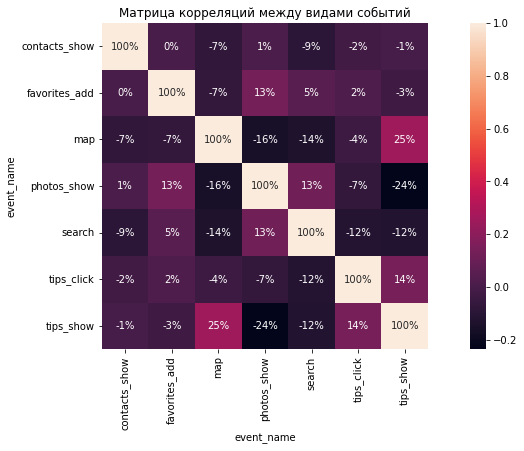

In [115]:
cm = df_corr.corr()

plt.figure(figsize=(15, 6))
sns.heatmap(cm, annot=True, square=True, fmt='.0%')
plt.title('Матрица корреляций между видами событий')
plt.show()

Всё верно, самые сильные корреляции у целевого события с поиском и просмотром карты, причем зависимость обратно пропорциональная - значит, чем меньше пользователь использует поиск в сессии, тем чаще просматривает контакты, и наоборот. Видимо, большое количество запросов (возможно, их уточнение) снижает количество объявлений в выдаче.

Степень корелляции с просмотром фото и рекомендаций незначительная, а с добавлением в избранное и вовсе равна нулю.

Чтобы окончательно убедиться в выводах, сделанных из корреляции, посмотрим на сесссии, где было 2 и более просмотров контактов.

In [116]:
contacts_more = df_final.query(
    'event_name == "contacts_show"'
).groupby('session_id').agg({'event_name':'count'}).query('event_name > 1')

In [117]:
contacts_more_list = contacts_more.reset_index()['session_id'].unique()

In [118]:
# увеличим срез до 10 событий внутри каждой сессии, так как рассматриваем повторяющиеся события одного вида

df_final[df_final['event_id'] <= 10].query(
    'session_id in @contacts_more_list'
).groupby('event_name').agg({'event_id':'describe'})

event_id                                    
                 count mean  std  min  25%  50%  75%   max
event_name                                                
advert_open      82.00 5.74 2.59 1.00 4.00 5.50 8.00 10.00
contacts_call   259.00 4.90 2.32 2.00 3.00 5.00 6.00 10.00
contacts_show 1,187.00 4.69 2.65 1.00 2.00 4.00 7.00 10.00
favorites_add    50.00 4.76 2.77 1.00 2.25 4.50 7.00 10.00
map             123.00 2.89 2.47 1.00 1.00 2.00 4.00 10.00
photos_show     315.00 4.75 2.73 1.00 2.00 4.00 7.00 10.00
search          230.00 3.38 2.65 1.00 1.00 2.00 5.00 10.00
tips_click       45.00 5.00 2.66 1.00 3.00 5.00 7.00 10.00
tips_show     1,054.00 5.19 2.77 1.00 3.00 5.00 8.00 10.00

In [119]:
# для сравнения посмотрим на ту же таблицу, где собраны сессии с 1 целевым событием

df_final[df_final['event_id'] <= 10].query(
    'session_id not in @contacts_more_list'
).groupby('event_name').agg({'event_id':'describe'})

event_id                                    
                 count mean  std  min  25%  50%  75%   max
event_name                                                
advert_open   1,621.00 4.92 2.65 1.00 3.00 5.00 7.00 10.00
contacts_call   136.00 3.26 1.78 2.00 2.00 3.00 4.00 10.00
contacts_show   507.00 3.20 2.18 1.00 2.00 3.00 4.00 10.00
favorites_add   472.00 4.45 2.45 1.00 2.00 4.00 6.00 10.00
map           1,927.00 2.97 2.46 1.00 1.00 2.00 4.00 10.00
photos_show   2,544.00 4.38 2.45 1.00 2.00 4.00 6.00 10.00
search        3,372.00 2.72 2.08 1.00 1.00 2.00 3.00 10.00
tips_click      344.00 4.59 2.42 1.00 3.00 4.00 6.00 10.00
tips_show     9,173.00 5.28 2.58 1.00 3.00 5.00 7.00 10.00

ТОП 3 событий с минимальным средним значением не меняется, меняются местами только просмотр карты и поиск - это скорей всего связано с частотой использования поиска для выбора наиболее релевантных объявлений.

Посмотрим, отличается ли воронка для сессий безе целевого события.

In [120]:
df_final[df_final['event_id'] <= 5].query(
    'session_id not in @contacts_show_sessions'
).groupby('event_name').agg({'event_id':'describe'})

event_id                                   
                 count mean  std  min  25%  50%  75%  max
event_name                                               
advert_open     911.00 3.07 1.31 1.00 2.00 3.00 4.00 5.00
favorites_add   279.00 3.16 1.31 1.00 2.00 3.00 4.00 5.00
map           1,524.00 2.07 1.32 1.00 1.00 2.00 3.00 5.00
photos_show   1,429.00 3.10 1.23 1.00 2.00 3.00 4.00 5.00
search        2,712.00 2.12 1.20 1.00 1.00 2.00 3.00 5.00
tips_click      206.00 3.08 1.20 1.00 2.00 3.00 4.00 5.00
tips_show     4,428.00 3.37 1.28 1.00 2.00 3.00 4.00 5.00

Явных отличий нет, опять же эти сессии могут быть началом пути пользователя к следующим сессиям уже с просмотром контактов.

В конце анализа посмотрим, за какое время до целевого события совершаются вспомогательные события. Для этого упростим датафрейм, но добавим в каждую строку с очередным событием вид следующего события в сессии и время между ними.

In [121]:
def get_next_event(x):
    return x['event_name'].shift(-1)

df_final['next_event'] = df_final.groupby('session_id').apply(
    lambda x: get_next_event(x)).reset_index(0, drop=True)

df_plotly = df_final[['session_id','event_name','event_time','event_id','next_event']]
df_plotly.columns = ['user_id','event_name','time_event','rank_event','next_action']
df_plotly.head()

user_id event_name                 time_event  rank_event next_action
0        2     search 2019-10-18 22:14:05.555052           1      search
1        2     search 2019-10-18 22:14:16.960831           2         map
2        2        map 2019-10-18 22:17:40.719687           3         NaN
3        3     search 2019-10-20 17:47:18.569612           1      search
4        3     search 2019-10-20 17:47:19.889629           2      search

In [122]:
def get_time_diff(x):
    return x['event_time'].shift(-1) - x['event_time']

df_plotly['time_to_next'] = df_final.groupby('session_id').apply(
    lambda x: get_time_diff(x)).reset_index(0, drop=True)

df_plotly.head()

user_id event_name                 time_event  rank_event next_action  \
0        2     search 2019-10-18 22:14:05.555052           1      search   
1        2     search 2019-10-18 22:14:16.960831           2         map   
2        2        map 2019-10-18 22:17:40.719687           3         NaN   
3        3     search 2019-10-20 17:47:18.569612           1      search   
4        3     search 2019-10-20 17:47:19.889629           2      search   

            time_to_next  
0 0 days 00:00:11.405779  
1 0 days 00:03:23.758856  
2                    NaT  
3 0 days 00:00:01.320017  
4 0 days 00:00:18.463538

Теперь можно сделать срез по событиям вида `'contacts_show'` в столбце `'next_action'` и посмотреть:
* какие виды событий чаще всего встречаются до целевого,
* сколько времени отделяет их друг от друга.

In [123]:
df_plotly.query('next_action == "contacts_show"').groupby('event_name')['event_name'].count().sort_values(ascending=False)

event_name
tips_show        702
contacts_show    584
photos_show      269
search           148
contacts_call    135
advert_open       42
favorites_add     32
map               27
tips_click         8
Name: event_name, dtype: int64

Рейтинг событий, происходящих до целевого, заставляет добавить новые воронки или усложнить имеющуюся засчет перехода к просмотру контактов после просмотра рекомендаций и фотографий. Посмотрим, что предшествует этим 2 событиям.

In [124]:
df_plotly.query('next_action == "tips_show"').groupby('event_name')['event_name'].count().sort_values(ascending=False)

event_name
tips_show        10316
advert_open       1637
map               1196
contacts_show      540
search             534
tips_click         377
favorites_add       87
photos_show          4
Name: event_name, dtype: int64

Логично, что одни рекомендации просматриваются после других, а также после открытия карточки с объявлением и карты, которая, скорей всего, служит и дополнительным средством поиска в приложении.

In [125]:
df_plotly.query('next_action == "photos_show"').groupby('event_name')['event_name'].count().sort_values(ascending=False)

event_name
photos_show      2279
search            697
favorites_add     144
contacts_show     130
contacts_call      61
advert_open        54
Name: event_name, dtype: int64

Здесь тоже все логично, и можно предположить, что в приложении есть возможность просматривать фотографии из разных объявлений потоком, а если нет - то стоит ее добавить с учетом популярности события по всех разрезах.

Вернемся, к вопросу времени, которое проходит между целевым и вспомогательными событиями.

In [126]:
df_plotly.query('next_action == "contacts_show"')['time_to_next'].describe()

count                         1947
mean     0 days 00:02:36.628918648
std      0 days 00:04:11.126278181
min         0 days 00:00:00.000008
25%      0 days 00:00:23.642034500
50%         0 days 00:01:06.859634
75%         0 days 00:02:52.493483
max         0 days 00:29:45.300213
Name: time_to_next, dtype: object

В среднем пользователю нужно 2,5 минуты, чтобы ознакомиться с объявлением и принять решение просмотреть контакты. Значение может быть завышено с учетом выброса(ов) длиной почти в полчаса, поэтому лучше опираться на медиану с отметкой чуть выше 1 минуты, хотя есть и те, кому нужны милисекунды, чтобы определиться. Посмотрим на медиану по времени для разных видов событий.

Для расчета медианы подходят не все типы данных. Проверим сперва, соответствует ли им столбец `'time_to_next'`.

In [127]:
df_plotly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31771 entries, 0 to 31770
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   user_id       31771 non-null  int64          
 1   event_name    31771 non-null  object         
 2   time_event    31771 non-null  datetime64[ns] 
 3   rank_event    31771 non-null  int64          
 4   next_action   28226 non-null  object         
 5   time_to_next  28226 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), int64(2), object(2), timedelta64[ns](1)
memory usage: 1.5+ MB


Тип данных `timedelta64` не подходит для расчета медианы, поэтому добавим функцию для перевода данных в секунды (тип данных `float`) и запишем результат в новый столбец, чтобы не терять исходный.

In [128]:
def timedelta_to_seconds(duration):
    days, seconds = duration.days, duration.seconds
    result = days // (60 * 60 * 24) + seconds
    return result

In [129]:
df_plotly['time_to_next_ts'] = df_plotly['time_to_next'].apply(timedelta_to_seconds)
df_plotly.head()

user_id event_name                 time_event  rank_event next_action  \
0        2     search 2019-10-18 22:14:05.555052           1      search   
1        2     search 2019-10-18 22:14:16.960831           2         map   
2        2        map 2019-10-18 22:17:40.719687           3         NaN   
3        3     search 2019-10-20 17:47:18.569612           1      search   
4        3     search 2019-10-20 17:47:19.889629           2      search   

            time_to_next  time_to_next_ts  
0 0 days 00:00:11.405779            11.00  
1 0 days 00:03:23.758856           203.00  
2                    NaT              NaN  
3 0 days 00:00:01.320017             1.00  
4 0 days 00:00:18.463538            18.00

In [130]:
df_plotly.query('next_action == "contacts_show"').groupby('event_name').agg(
    {'time_to_next_ts':'median'}
).sort_values(by='time_to_next_ts')

time_to_next_ts
event_name                    
advert_open              33.50
contacts_show            43.50
favorites_add            47.00
map                      58.00
tips_show                67.00
photos_show              71.00
search                   87.50
contacts_call           156.00
tips_click              312.00

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " > <b>Комментарии от тимлида ❌ : </b> 

Здесь к сожалению ошибка с форматом `time_to_next`
</div>

<div class="alert alert-note" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid " >
<b>Комментарии от студента: </b> 

Код полностью работал за исключение диаграммы Sankey - проверил несколько раз перед отправкой на проверку. Так или иначе добавил выше функцию для перевода типа данных и расчета медианы. Надеюсь, у тебя будет всё ок - у меня работает ))

</div>

Меньше всего времени на переход к целевому событию тратят те, кто открыл карточку объявления (это логично, там должна быть крупнее кнопка, чем в поиске, например). Чуть больше уходит на выбор контактов из избранного, а далее по возрастающей - из карты, рекомендаций, фотографий и поиска.

Таким образом:

* чаще всего сессии начинаются с поиска или просмотра карты, которая, скорей всего, расширяет возможности навигации по каталогу,
* чаще всего вместе с целевым событием в сессиях встречаются просмотры рекомендаций и фотографий,
* при этом самые сильные корреляции у целевого события с поиском и просмотром карты, причем зависимость обратно пропорциональная,
* на этом основании можно выделить 3 наиболее популярных типа воронки с достижением целевого действия:
  * просмотр карты > поиск > просмотр контактов
  * просмотр рекомендаций > просмотр контактов
  * просмотр фотографий > просмотр контактов
* на принятие решения о просмотре контактов и перехода от следующего события пользователю нужно чуть больше 1 минуты

&uarr; [Структура исследования](#Структура-исследования)

## Проверка гипотез

Для проверки гипотез предлагаю использовать основной датасет `'dataset_filtered'`, откуда исключены только пользователи с единичными событиями и выбросами выше аномальных значений, и анализировать действия пользователей без разбивки на сессии, чтобы исключить вероятность ошибки при таком делении. Таким образом, мы оценим, насколько пользователи приложения конвертируются в целевое событие.

In [131]:
dataset_filtered.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:07.039334    tips_show   
3 2019-10-07 00:01:27.770232  advert_open   
4 2019-10-07 00:01:34.804591    tips_show   

                                user_id source        date  weekday  
0  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
1  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
2  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
3  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0  
4  020292ab-89bc-4156-9acf-68bc2783f894  other  2019-10-07        0

### Первая гипотеза

Нулевая гипотеза - конверсия в просмотры контактов у двух групп (первая совершает действия `tips_show` и `tips_click`, вторая - только `tips_show`) одинаковая. Альтернативная - конверсия между группами отличается.

Так как мы проверяем гипотезу о равенстве долей по выборкам, используем z-test.

In [132]:
# сформируем списки, по которым будем фильтровать пользователей по видам нужных событий
users_tips_show = dataset_filtered.query('event_name == "tips_show"')['user_id'].unique()
users_tips_click = dataset_filtered.query('event_name == "tips_click"')['user_id'].unique()

In [133]:
first_all = dataset_filtered.query(
    'user_id in @users_tips_show and user_id in @users_tips_click'
)['user_id'].nunique()

first_aim = dataset_filtered.query(
    'user_id in @users_tips_show and user_id in @users_tips_click and event_name == "contacts_show"'
)['user_id'].nunique()

print('Конверсия первой группы:', '{:.2%}'.format(first_aim / first_all))

Конверсия первой группы: 23.50%


In [134]:
second_aim = dataset_filtered.query(
    'user_id in @users_tips_show and user_id not in @users_tips_click and event_name == "contacts_show"'
)['user_id'].nunique()

second_all = dataset_filtered.query(
    'user_id in @users_tips_show and user_id not in @users_tips_click'
)['user_id'].nunique()

print('Конверсия первой группы:', '{:.2%}'.format(second_aim / second_all))

Конверсия первой группы: 15.68%


Фактически конверсия заметно отличается, и пользователи, которые кликают по рекомендациям, чаще совершают целевое действие, но является ли эта разница статистически значимой - проверим.

In [135]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([first_aim, second_aim])
trials = np.array([first_all, second_all])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

In [136]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

In [137]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  0.0029202009368458626
Отвергаем нулевую гипотезу: между долями есть значимая разница


Разницы между пропорциями при указанных размерах выборок достаточно, чтобы говорить о статистически значимом различии.

### Вторая гипотеза

Нулевая гипотеза - конверсия в просмотры контактов у двух групп (первая совершает действие `favorites_add`, вторая - нет) одинаковая. Альтернативная - конверсии между группами отличаются.

Так как мы снова проверяем гипотезу о равенстве долей по выборкам, используем всё тот же z-test.

In [138]:
users_favorites_add = dataset_filtered.query('event_name == "favorites_add"')['user_id'].unique()

In [139]:
fav_add_all = dataset_filtered.query('user_id in @users_favorites_add')['user_id'].nunique()

fav_add_aim = dataset_filtered.query('user_id in @users_favorites_add and event_name == "contacts_show"')['user_id'].nunique()

print('Конверсия первой группы:', '{:.2%}'.format(fav_add_aim / fav_add_all))

Конверсия первой группы: 35.79%


In [140]:
no_fav_aim = dataset_filtered.query(
    'user_id not in @users_favorites_add and event_name == "contacts_show"'
)['user_id'].nunique()

no_fav_all = dataset_filtered.query('user_id not in @users_favorites_add')['user_id'].nunique()

print('Конверсия первой группы:', '{:.2%}'.format(no_fav_aim / no_fav_all))

Конверсия первой группы: 20.35%


Количественная конверсия между этими группами значительно выше, чем при провеhrt первой гипотезы. Больше трети пользователей, которые добавляют товары в избранное, совершают целевое действие - в то время, как 20% из остальных просматривают контакты. Проверим, является ли эта разница статистически значимой.

In [141]:
alpha = .05 # критический уровень статистической значимости

successes = np.array([fav_add_aim, no_fav_aim])
trials = np.array([fav_add_all, no_fav_all])

# пропорция успехов в первой группе:
p1 = successes[0]/trials[0]

# пропорция успехов во второй группе:
p2 = successes[1]/trials[1]

# пропорция успехов в комбинированном датасете:
p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

# разница пропорций в датасетах
difference = p1 - p2

In [142]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

In [143]:
# считаем статистику в ст.отклонениях стандартного нормального распределения
z_value = difference / mth.sqrt(
    p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
)

# задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    )

p-значение:  2.3863433451509763e-09
Отвергаем нулевую гипотезу: между долями есть значимая разница


Разница в конверсиях между группами является статистически значимой. Проверка обеих гипотех прошла успешно.

&uarr; [Структура исследования](#Структура-исследования)

## Выводы и рекомендации

Целью проекта было оценить степень влияния действий пользователя на целевое событие (просмотр контактов) в приложении с объявлениями о продаже вещей. Для этого требовалось проанализировать связи событий и дать оценку действий, которые чаще совершают те пользователи, которые просматривают контакты.

Для анализа были даны записи за неполные 28 дней о 74197 событиях от 4293 уникальных пользователей. Что можно сказать о них:

* пользователи чаще пользуются приложением в среду и четверг, а лучше всего конвертируются в четверг, хуже - в среду;
* 21% от общего числа пользователей (без учета выбросов) совершает целевые события, что близко к закону Парето;
* lifetime среднего пользователя (без выбросов) составляет 1 день и 10 часов, при этом 1 сессия чаще всего длится около 30 минут;
* поведение пользователей хаотично - когорты могут увеличивать retention rate кратно после падения, пусть и на считанные дни;
* половина пользователей установила приложение из источника `'yandex'`, но при доле `'google'` в 2 раза ниже, привлеченные им пользователи лучше конвертируются в целевое действие.

Если использовать деление на сессии в разрывом событий не менее, чем на полчаса, то можно сделать следующие выводы:

* 39% сессий состоят из событий одного вида, где больше половины составляют просмотры рекомендаций;
* остальные сессии чаще всего начинаются с поиска или просмотра карты - у них самая высокая корреляция с целевым событием;
* значит, чем меньше пользователь использует поиск в сессии, тем чаще просматривает контакты, и наоборот;
* чаще всего вместе с целевым событием в сессиях встречаются просмотры рекомендаций и фотографий;
* при этом просмотр рекомендаций с откликом на них, а также добавление в избранное увеличивают конверсию в целевое действие;
* на этом основании можно выделить 3 наиболее популярных типа воронки с достижением целевого действия:
  * просмотр карты > поиск > просмотр контактов
  * просмотр рекомендаций > просмотр контактов
  * просмотр фотографий > просмотр контактов
* на принятие решения о просмотре контактов и перехода от следующего события пользователю нужно чуть больше 1 минуты.

Возможности по анализу воронок и путей пользователя ограничены отсутствием инструмента для визуализации сессий, а также механизмом учета ассоциированных конверсий - это рекомендация для дата инженеров и аналитиков, которые собирают и обрабатывают данные. Такие инструменты дают точную картину по длине сессии, позволяют собирать сводные представления о разных группах пользователей и рассчитывать как удержание, так и отток на разных этапах воронки.

Стоит зафиксировать в рекомендациях для сбора данных необходимость в более точном описании работы самого приложения, включая графический интерфейс, точки входа и возможности разных элементов. Например, интересным представляется функционал карты, которая служит дополнительным инструментом поиска и навигации по объявлениям, судя по сделанным расчетам и выявленным зависимостям.

В конце стоит отметить, что нестабильный retention rate может говорить о том, что в приложении совершаются чаще импульсные действия и покупки, чем плановые, и не хватает механизмов по удержанию, которые задавали бы определенные (читай, управляемые) тренды между разными когортами. При этом отлично налажена работа и маркетинговые аткивности по стимулированию пользователей, так как DAU и количество ежедневно регистриуемых событий увеличивается от недели к неделе.

&uarr; [Структура исследования](#Структура-исследования)